#### Import Necessary Libraries

In [1]:
import copy
from functools import partial
from tqdm import tqdm
from datetime import timedelta

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

### Load and Preprocess Data

Loading Data of 09-02-2025-NOON for ['BTCUSDT', 'ETHUSDT']...


100%|██████████| 2/2 [00:00<00:00,  8.63it/s]


Checking for gaps in the depth data captured with time difference > 400ms...
Series([], Name: timestamp, dtype: timedelta64[ns])
Series([], Name: timestamp, dtype: timedelta64[ns])
Preprocessing Data...


100%|██████████| 2676299/2676299 [00:42<00:00, 63262.18it/s]


Computing Reference Prices...
Reconstructing LOB from trades data...


100%|██████████| 2023657/2023657 [00:06<00:00, 328468.28it/s]


Reconstructing Cancel Orders from trades...


100%|██████████| 2023657/2023657 [00:18<00:00, 111018.23it/s]


Visualizing Reference Price Movement...


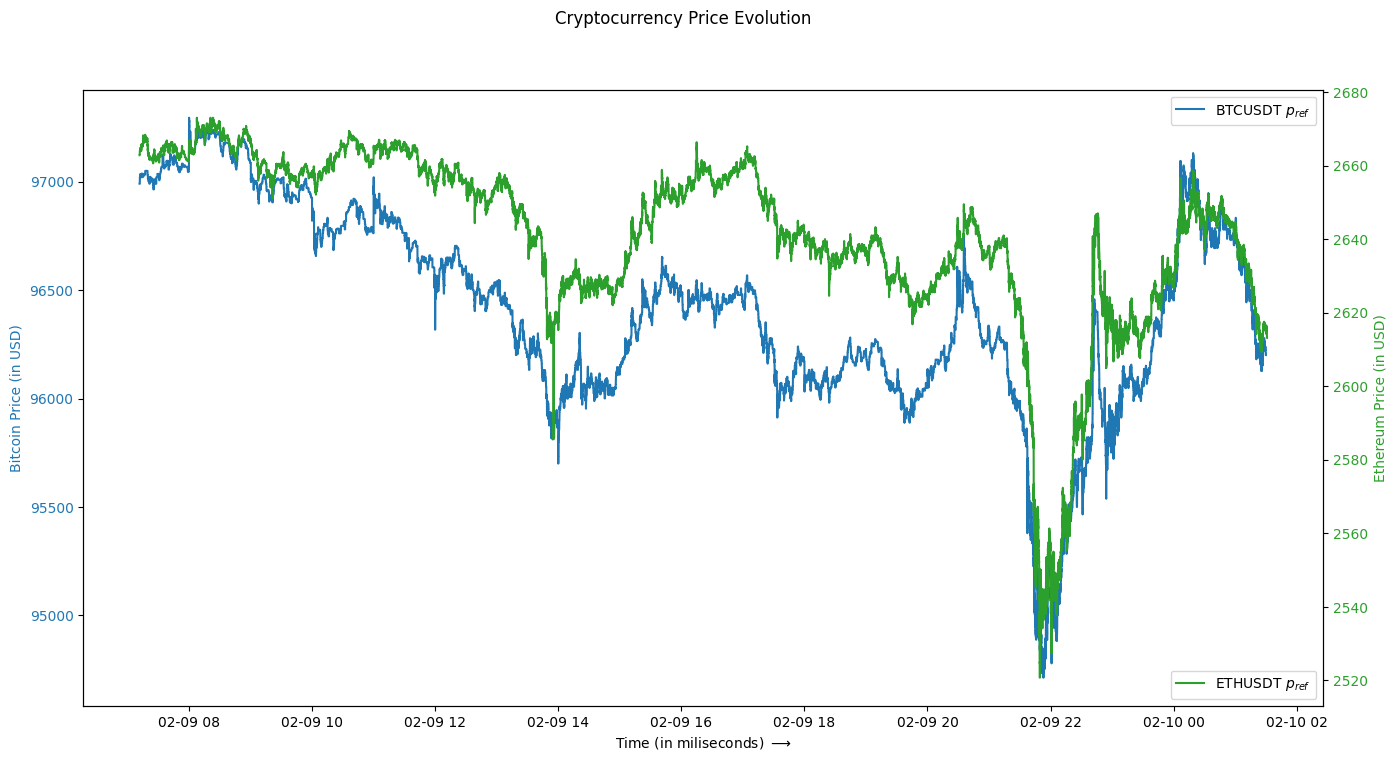

Visualizing Reconstructed Price Path between LOB Snapshots...


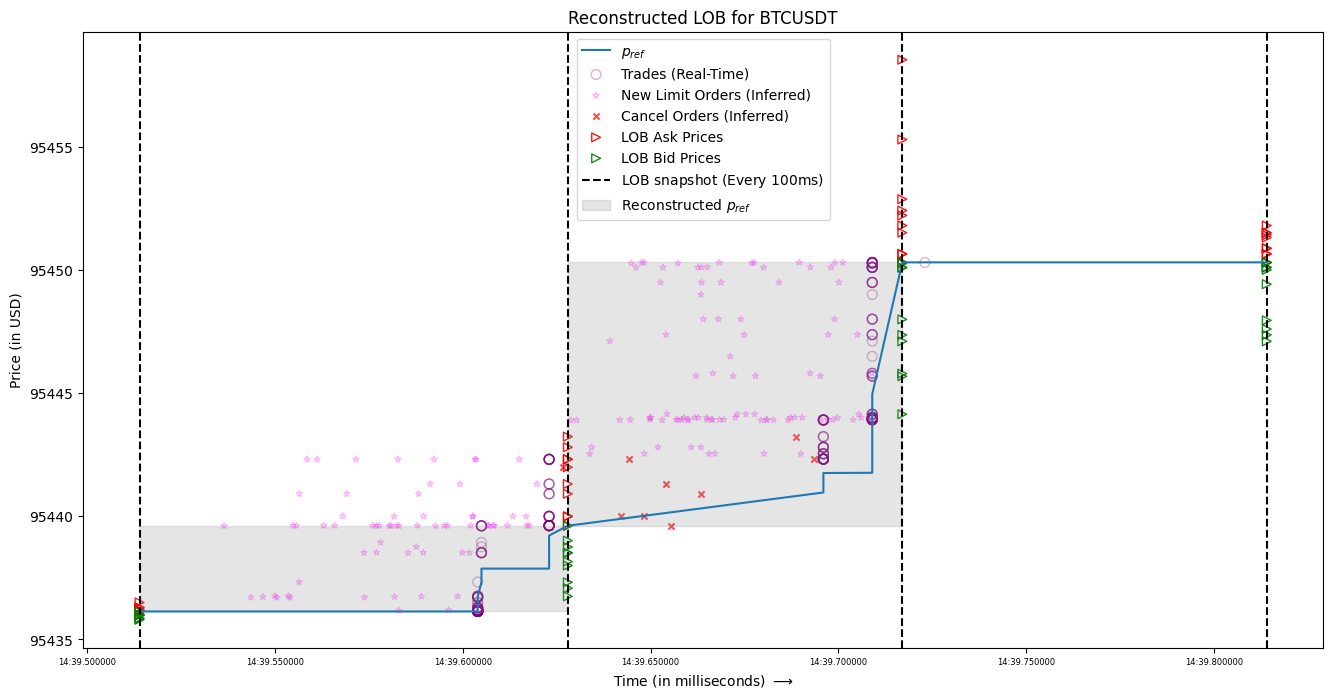

Converting Depth and Trades data to Queue Numbers...


100%|██████████| 2/2 [00:00<00:00, 12.76it/s]


Performing Validation Checks for Trade Queue Numbers...
Checking BTCUSDT...
Case 1: p > 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 2: p < 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 3: p == 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 4: p == 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Checking ETHUSDT...
Case 1: p > 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 2: p < 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 3: p == 0, mm_buy == 1
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Case 4: p == 0, mm_buy == 0
Empty DataFrame
Columns: [p, q, mm_buy]
Index: []
Computing ATS...
Visualizing the Queue Numbers present in the LOB snapshots....


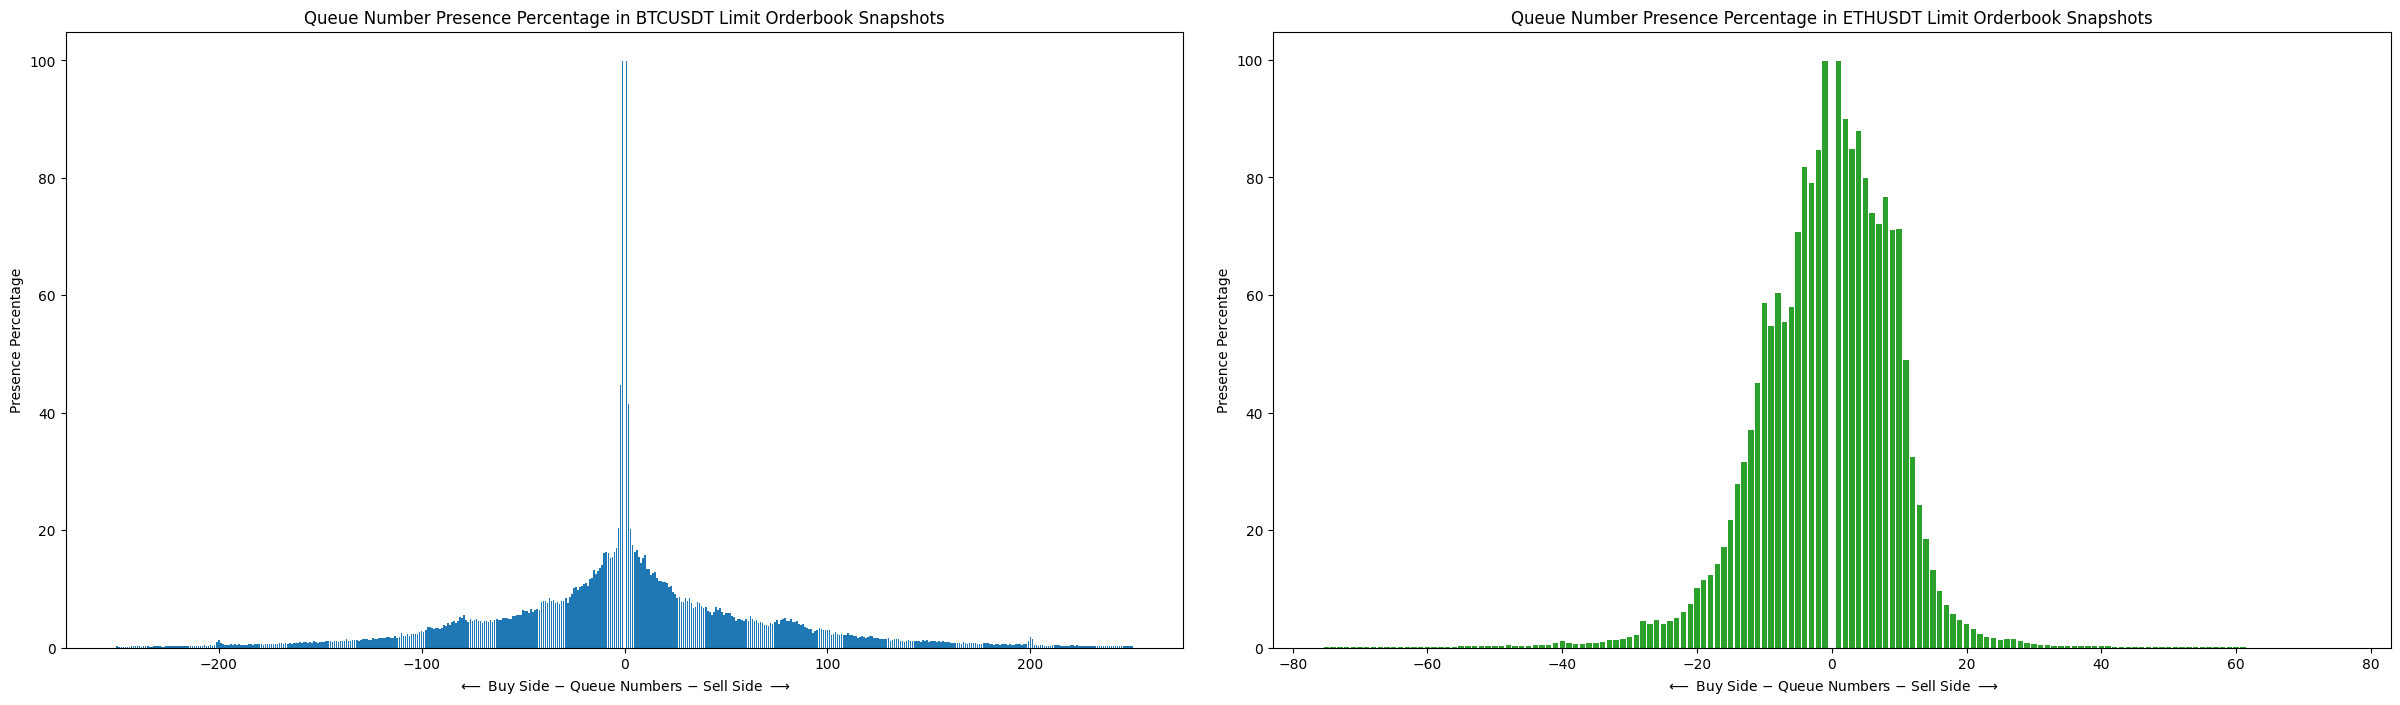

Visualizing the ATS...


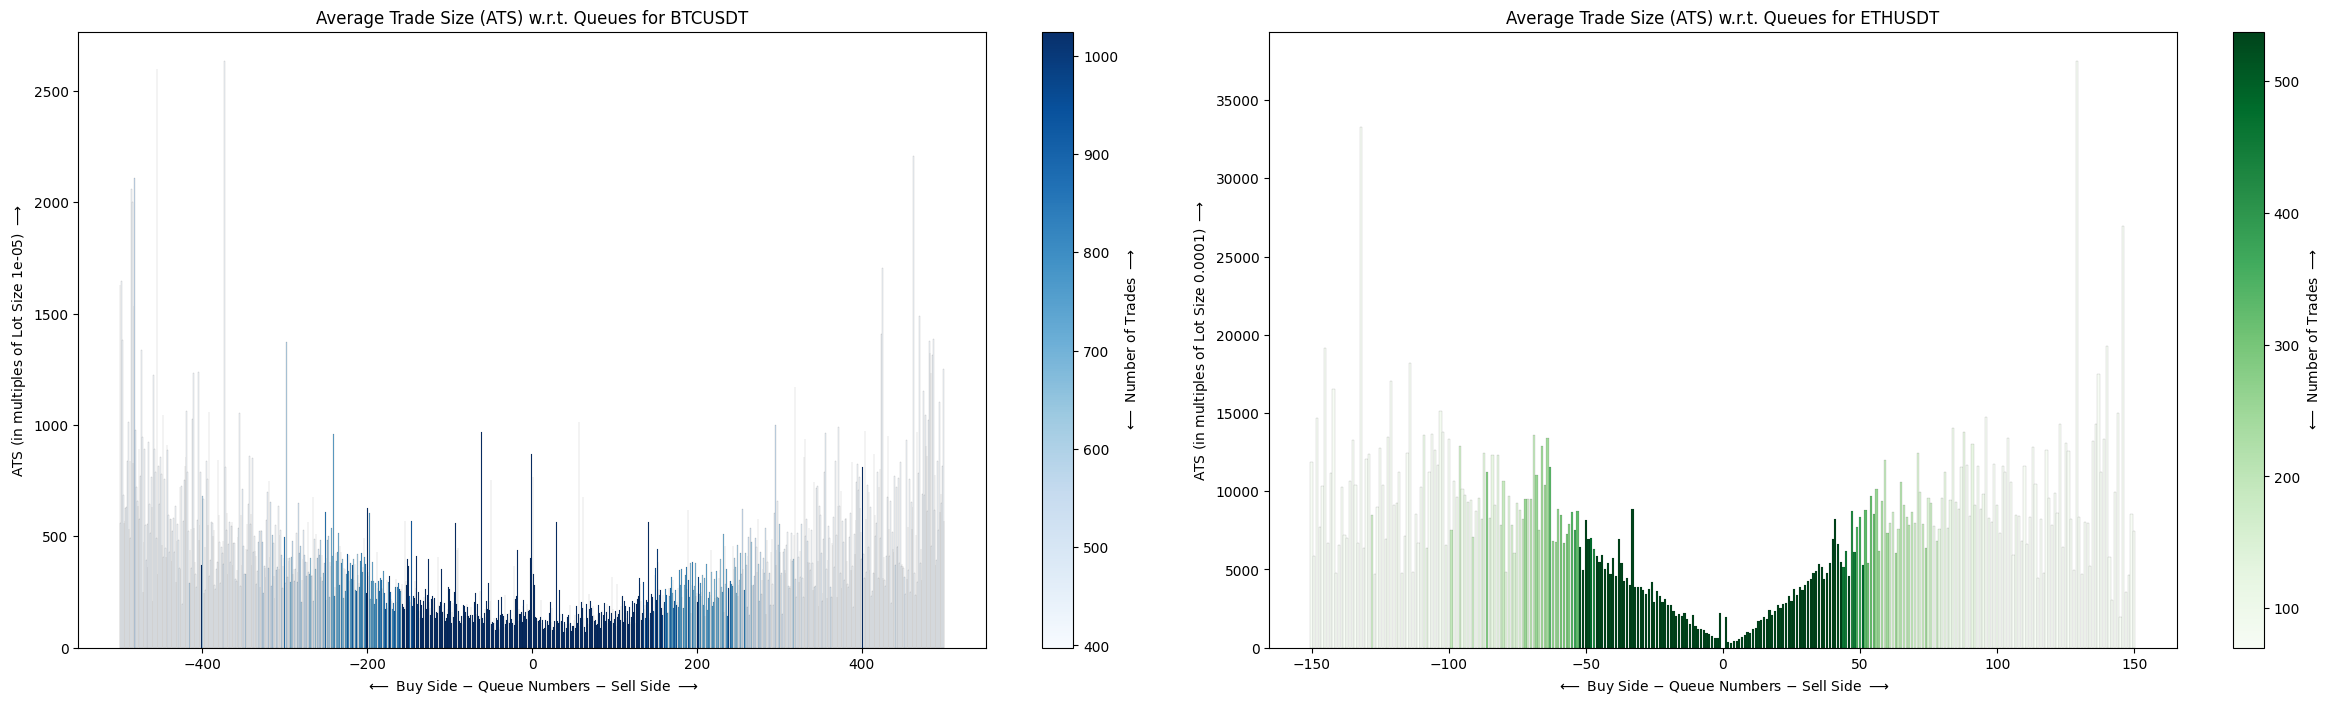

Computing Max Symmetric Queue Number with ATS avaialability...
Max Queue Number (Symmetric) with ATS available for BTCUSDT: 1624
Max Queue Number (Symmetric) with ATS available for ETHUSDT: 183
Removing unavailable ATS queue numbers from depth data...


100%|██████████| 2/2 [00:05<00:00,  2.73s/it]


Removing unavailable ATS queue numbers from trade data...


100%|██████████| 2/2 [00:00<00:00,  8.18it/s]


Converting volumes in depth data to queue size...


100%|██████████| 2/2 [06:04<00:00, 182.41s/it]


Converting volumes in trades data to queue size...


100%|██████████| 2/2 [00:07<00:00,  3.70s/it]

BTCUSDT Depth Data:


,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:01.914,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.014,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.114,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.214,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.114,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.214,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1


BTCUSDT Trades Data:


,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,1,1,0
2025-02-09 07:12:02.069,1,3,0
2025-02-09 07:12:02.071,-1,1,1
2025-02-09 07:12:02.464,1,2,0
2025-02-09 07:12:03.252,1,1,0
...,...,...,...
2025-02-10 01:29:48.730,1,3,0
2025-02-10 01:29:49.639,-1,1,1
2025-02-10 01:29:49.970,1,1,0


BTCUSDT Reference Prices:


,rp,trade
timestamp,,
2025-02-09 07:12:01.814,9698999.5,0
2025-02-09 07:12:01.914,9698999.5,0
2025-02-09 07:12:02.014,9698999.5,0
2025-02-09 07:12:02.067,9698999.5,1
2025-02-09 07:12:02.069,9698999.5,1
...,...,...
2025-02-10 01:29:51.014,9620000.5,0
2025-02-10 01:29:51.114,9620000.5,0
2025-02-10 01:29:51.214,9620000.5,0


BTCUSDT ATS:


,q
p,
-11845,54.000000
-6345,264.000000
-5613,738.500000
-5604,6.000000
-5587,6.000000
...,...
13470,35.000000
13482,6.000000
13490,48.000000


BTCUSDT Reconstructured Orderbook:


,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:02.067,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2675,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.069,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.071,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.464,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.252,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:48.730,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1176,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,2,36,37,38,56,79,83,199,200,0,0,0,0,0,0,0,0,0,0,787,1,1,49,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.639,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.970,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0


BTCUSDT New Limits:


,bp1,ap1,newlim
timestamp,,,
2025-02-09 07:12:02.067,-1,1,0
2025-02-09 07:12:02.069,-1,1,0
2025-02-09 07:12:02.071,-1,1,0
2025-02-09 07:12:02.464,-1,1,0
2025-02-09 07:12:03.252,-1,1,0
...,...,...,...
2025-02-10 01:29:48.730,-1,1,0
2025-02-10 01:29:49.639,-1,1,0
2025-02-10 01:29:49.970,-1,1,0


In [2]:
%run preprocess.ipynb

### Model Data

In [ ]:
for i in tqdm(range(data['DEPTH']['BTCUSDT'].shape[0])):
    hehe = data['DEPTH']['BTCUSDT'].iloc[i]

100%|██████████| 655977/655977 [00:19<00:00, 33310.24it/s]


In [9]:
for i in tqdm(range(data['DEPTH']['BTCUSDT'].shape[0])):
    hehe = data['DEPTH']['BTCUSDT'].iloc[i]
    hehe.loc['bp1':'bp10']
    hehe.loc['bv1':'bv10']
    hehe.loc['ap1':'ap10']
    hehe.loc['av1':'av10']

100%|██████████| 655977/655977 [01:39<00:00, 6591.64it/s]


In [7]:
hulu = data['DEPTH']['BTCUSDT'].values
for i in tqdm(range(data['DEPTH']['BTCUSDT'].shape[0])):
    hehe = hulu[i]

100%|██████████| 655977/655977 [00:00<00:00, 4323458.67it/s]


In [14]:
data['NEWLIM']['BTCUSDT']#.values

,bp1,ap1,newlim
timestamp,,,
2025-02-09 07:12:02.067,-1,1,0
2025-02-09 07:12:02.069,-1,1,0
2025-02-09 07:12:02.071,-1,1,0
2025-02-09 07:12:02.464,-1,1,0
2025-02-09 07:12:03.252,-1,1,0
...,...,...,...
2025-02-10 01:29:48.730,-1,1,0
2025-02-10 01:29:49.639,-1,1,0
2025-02-10 01:29:49.970,-1,1,0


In [3]:
MAX_QNS = {'BTCUSDT': 400, 'ETHUSDT': 150}

In [4]:
print('Computing Event Times and Event Sizes...')
# stores the info about the event times and sizes for each crypto pair
queue_infos = {crypto_pair: {'event_times': None, 'event_sizes': None} for crypto_pair in CRYPTO_PAIRS}

for crypto_pair in CRYPTO_PAIRS:

    # the number of queues we will consider o.w. it becomes computationally expensive
    MAX_QN = MAX_QNS[crypto_pair]
        
    # maintains the queue size for each queue number
    queues = {
        'bid': np.zeros(MAX_QN+1, np.int64),
        'ask': np.zeros(MAX_QN+1, np.int64),
    }
    # stores the event sizes
    event_sizes = {
        'limit': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        },
        'market': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        },
        'cancel': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        }
    }
    # stores the event times
    timers = {
        'limit': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        },
        'market': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        },
        'cancel': {
            'bid': {
                qn: list() for qn in range(MAX_QN+1)
            },
            'ask': {
                qn: list() for qn in range(MAX_QN+1)
            },
        }
    }
    # # set the starting time for each queue in limit, cancel and market orders as the first time in the LOB snapshot
    # # and since we do not have any events preceding it we set the event sizes to 0 as a marker for this
    # for ordertype in ['limit', 'cancel', 'market']:
    #     for side in ['bid', 'ask']:
    #         for qn in range(MAX_QN+1):
    #             timers[ordertype][side][qn].append(data['DEPTH'][crypto_pair].index[0])
    #             event_sizes[ordertype][side][qn].append(0)

    # stores the position in the depth and trades data
    odb_ptr, trade_ptr = 0, 0
    # stores the prev and current reference price
    prev_rp = 0
    curr_rp = data['REFPRICE'][crypto_pair].iloc[odb_ptr + trade_ptr].rp
    prev_bid_qns = prev_ask_qns = 0
    depth_timestamps = data['DEPTH'][crypto_pair].index.to_numpy()
    depth = data['DEPTH'][crypto_pair].values
    trade_timestamps = data['TRADE'][crypto_pair].index.to_numpy()
    trade = data['TRADE'][crypto_pair].values
    recons_odb = data['RDEPTH'][crypto_pair].values
    rdepthlevs = data['RDEPTHLEVELS'][crypto_pair]
    newlims = data['NEWLIM'][crypto_pair].values
    cancels = data['CANCEL'][crypto_pair].values
    ref_price = data['REFPRICE'][crypto_pair].rp.values

    for i in tqdm(range(data['DEPTH'][crypto_pair].shape[0] + data['TRADE'][crypto_pair].shape[0])):

        # get the current reference price
        curr_rp = ref_price[odb_ptr + trade_ptr]

        if trade_ptr >= data['TRADE'][crypto_pair].shape[0] or depth_timestamps[odb_ptr] <= trade_timestamps[trade_ptr]:

            # current time
            t = depth_timestamps[odb_ptr]

            # print('LOB:', t)
            odb_data = depth[odb_ptr]

            # get the queue numbers which might get modified by this LOB snapshot
            bid_qns = np.abs(odb_data[:10]) # np.abs(odb_data.loc['bp1':'bp10'])
            ask_qns = np.abs(odb_data[20:30]) # np.abs(odb_data.loc['ap1':'ap10'])
            # set the larger queue numbers to 0 as we don't want to deal with them
            bid_qns[np.logical_or(bid_qns < -MAX_QN, bid_qns > MAX_QN)] = 0
            ask_qns[np.logical_or(ask_qns < -MAX_QN, ask_qns > MAX_QN)] = 0

            # store the previous state of the queue sizes to compare if there has been any update
            prev_bid_queues = queues['bid'].copy()
            prev_ask_queues = queues['ask'].copy()

            # if the reference price changes then zero out the bid and ask queues and set the time of all the queues to this
            if curr_rp != prev_rp:
                queues['bid'][:] = 0
                queues['ask'][:] = 0
                # if the reference price has changed market all the queue timers to current time
                for ordertype in ['limit', 'cancel', 'market']:
                    for side in ['bid', 'ask']:
                        for qn in range(MAX_QN+1):
                            timers[ordertype][side][qn].append(t)
                            event_sizes[ordertype][side][qn].append(0)

            # update the bid and ask queue sizes for this LOB snapshot
            queues['bid'][bid_qns] = odb_data[10:20] # odb_data.loc['bv1':'bv10']
            queues['ask'][ask_qns] = odb_data[30:]# odb_data.loc['av1':'av10']
            
            # if the reference price hasn't changed
            if curr_rp == prev_rp:
                # update the timers and event sizes of the limit orders for the bid and ask side
                bid_diff = queues['bid'] - prev_bid_queues
                ask_diff = queues['ask'] - prev_ask_queues
                limit_bid_qns = np.where(bid_diff > 0)[0]
                limit_ask_qns = np.where(ask_diff > 0)[0]

                for qn in limit_bid_qns:
                    # print('limit', 'bid', qn)
                    timers['limit']['bid'][qn].append(t)
                    event_sizes['limit']['bid'][qn].append(bid_diff[qn])
                for qn in limit_ask_qns:
                    # print('limit', 'ask', qn)
                    timers['limit']['ask'][qn].append(t)
                    event_sizes['limit']['ask'][qn].append(ask_diff[qn])

                # update the timers and event sizes of the cancel orders for the bid and ask side
                cancel_bid_qns = np.where(bid_diff < 0)[0]
                cancel_ask_qns = np.where(ask_diff < 0)[0]

                for qn in cancel_bid_qns:
                    # print('cancel', 'bid', qn)
                    timers['cancel']['bid'][qn].append(t)
                    event_sizes['cancel']['bid'][qn].append(np.abs(bid_diff[qn]))
                for qn in cancel_ask_qns:
                    # print('cancel', 'ask', qn)
                    timers['cancel']['ask'][qn].append(t)
                    event_sizes['cancel']['ask'][qn].append(np.abs(ask_diff[qn]))
            # print('----------------')
            odb_ptr += 1
        
        else:

            # current time
            t = trade_timestamps[trade_ptr]
            # print('TRADE:', t)
            # current trade info
            curr_trade = trade[trade_ptr]
            p = np.abs(curr_trade[0]) # np.abs(curr_trade.loc['p'])
            q = curr_trade[1] # curr_trade.loc['q']
            mm_buy = curr_trade[2] # curr_trade.loc['mm_buy']

            recons_trade_odb = recons_odb[trade_ptr]

            # get the queue numbers which might get modified by this trade
            bid_qns = np.abs(recons_trade_odb[:rdepthlevs]) # np.abs(recons_trade_odb.loc['bp1':f"bp{data['RDEPTHLEVELS'][crypto_pair]}"])
            ask_qns = np.abs(recons_trade_odb[(2*rdepthlevs):(3*rdepthlevs)]) # np.abs(recons_trade_odb.loc['ap1':f"ap{data['RDEPTHLEVELS'][crypto_pair]}"])
            # set the larger queue numbers to 0 as we don't want to deal with them
            bid_qns[np.logical_or(bid_qns < -MAX_QN, bid_qns > MAX_QN)] = 0
            ask_qns[np.logical_or(ask_qns < -MAX_QN, ask_qns > MAX_QN)] = 0

            # store the previous state of the queue sizes to compare if there has been any update
            prev_bid_queues = queues['bid'].copy()
            prev_ask_queues = queues['ask'].copy()

            # if the reference price changes then zero out the bid and ask queues and set the time of all the queues to this
            if curr_rp != prev_rp:
                queues['bid'][:] = 0
                queues['ask'][:] = 0
                # if the reference price has changed market all the queue timers to current time
                for ordertype in ['limit', 'cancel', 'market']:
                    for side in ['bid', 'ask']:
                        for qn in range(MAX_QN+1):
                            timers[ordertype][side][qn].append(t)
                            event_sizes[ordertype][side][qn].append(0)
            
            # update the bid and ask queue sizes for this trade
            queues['bid'][bid_qns] = recons_trade_odb[rdepthlevs:(2*rdepthlevs)] # recons_trade_odb.loc['bv1':f"bv{data['RDEPTHLEVELS'][crypto_pair]}"]
            queues['ask'][ask_qns] = recons_trade_odb[(3*rdepthlevs):] # recons_trade_odb.loc['av1':f"av{data['RDEPTHLEVELS'][crypto_pair]}"]

            # is it a new limit order
            newlim_order = newlims[trade_ptr]

            # if this is a new limit order, I do not know the queue size at this queue
            # so I would instead assume that the queue size was exhausted but will update the limit timer
            if newlim_order[-1] > 0:
                qn = np.abs(newlim_order[1]) 
                if qn < -MAX_QN or qn > MAX_QN:
                    qn = 0
                # print('limit', 'ask', qn)
                # print('market', 'ask', qn)
                timers['limit']['ask'][qn].append(t)
                timers['market']['ask'][qn].append(t)
                event_sizes['limit']['ask'][qn].append(np.abs(newlim_order[-1]))#.append(np.abs(newlim_order.loc['newlim']))
                event_sizes['market']['ask'][qn].append(np.abs(newlim_order[-1]))#.append(np.abs(newlim_order.loc['newlim']))

            elif newlim_order[-1] < 0:
                qn = np.abs(newlim_order[0])
                if qn < -MAX_QN or qn > MAX_QN:
                    qn = 0
                # print('limit', 'bid', qn)
                # print('market', 'bid', qn)
                timers['limit']['bid'][qn].append(t)
                timers['market']['bid'][qn].append(t)
                event_sizes['limit']['bid'][qn].append(np.abs(newlim_order[-1]))#.append(np.abs(newlim_order.loc['newlim']))
                event_sizes['market']['bid'][qn].append(np.abs(newlim_order[-1]))#.append(np.abs(newlim_order.loc['newlim']))

            cancel_trade_orders = cancels[trade_ptr]
            
            # check for all the queue numbers which had seen cancelled orders before this trade that has resulted in removal of price level
            bid_cancel_qns = np.abs(cancel_trade_orders[:10]) #np.abs(cancel_trade_orders.loc['bp1':'bp10'])
            ask_cancel_qns = np.abs(cancel_trade_orders[20:30]) #np.abs(cancel_trade_orders.loc['ap1':'ap10'])
            # set the larger queue numbers to 0 as we don't want to deal with them
            bid_cancel_qns[np.logical_or(bid_cancel_qns < -MAX_QN, bid_cancel_qns > MAX_QN)] = 0
            ask_cancel_qns[np.logical_or(ask_cancel_qns < -MAX_QN, ask_cancel_qns > MAX_QN)] = 0
            bid_cancel_qsizes = np.abs(cancel_trade_orders[10:20]) #np.abs(cancel_trade_orders.loc['bv1':'bv10'])
            ask_cancel_qsizes = np.abs(cancel_trade_orders[30:]) #np.abs(cancel_trade_orders.loc['av1':'av10'])
            non_zero_bid_cancels = np.where(bid_cancel_qns)[0]
            non_zero_ask_cancels = np.where(ask_cancel_qns)[0]

            # if the bid cancel queue numbers has non-zero queue number then
            if non_zero_bid_cancels.shape[0]:
                for qn_idx in non_zero_bid_cancels:
                    if curr_rp != prev_rp:
                        event_sizes['cancel']['bid'][bid_cancel_qns[qn_idx]].pop()
                    else:
                        timers['cancel']['bid'][bid_cancel_qns[qn_idx]].append(t)
                        # print('cancel', 'bid', bid_cancel_qns[qn_idx])
                    event_sizes['cancel']['bid'][bid_cancel_qns[qn_idx]].append(bid_cancel_qsizes[qn_idx])
            
            # if the ask cancel queue numbers has non-zero queue number then
            if non_zero_ask_cancels.shape[0]:
                for qn_idx in non_zero_ask_cancels:
                    if curr_rp != prev_rp:
                        event_sizes['cancel']['ask'][ask_cancel_qns[qn_idx]].pop()
                    else:
                        timers['cancel']['ask'][ask_cancel_qns[qn_idx]].append(t)
                    # print('cancel', 'ask', ask_cancel_qns[qn_idx])
                    event_sizes['cancel']['ask'][ask_cancel_qns[qn_idx]].append(ask_cancel_qsizes[qn_idx])

            if curr_rp == prev_rp:
                # update the timers of the limit orders for the bid and ask side
                bid_diff = queues['bid'] - prev_bid_queues
                ask_diff = queues['ask'] - prev_ask_queues
                # find the market/cancel order queue numbers
                market_or_cancel_bid_qns = np.where(bid_diff < 0)[0]
                market_or_cancel_ask_qns = np.where(ask_diff < 0)[0]
                # if best bid in the difference then the current trade is a market order at the best bid
                if mm_buy and p in market_or_cancel_bid_qns:
                    # print('market', 'bid', p)
                    timers['market']['bid'][p].append(t)
                    event_sizes['market']['bid'][p].append(np.abs(bid_diff[p]))

                if (not mm_buy) and p in market_or_cancel_ask_qns:
                    # print('market', 'ask', p)
                    timers['market']['ask'][p].append(t)
                    event_sizes['market']['ask'][p].append(np.abs(ask_diff[p]))

                # if there are any other changes except for at the best bid/best ask then these are cancel orders
                cancel_bid_qns = np.setdiff1d(market_or_cancel_bid_qns, np.array([p]))
                cancel_ask_qns = np.setdiff1d(market_or_cancel_ask_qns, np.array([p]))
                for qn in cancel_bid_qns:
                    # print('cancel', 'bid', qn)
                    timers['cancel']['bid'][qn].append(t)
                    event_sizes['cancel']['bid'][qn].append(np.abs(bid_diff[qn]))
                for qn in cancel_ask_qns:
                    # print('cancel', 'ask', qn)
                    timers['cancel']['ask'][qn].append(t)
                    event_sizes['cancel']['ask'][qn].append(np.abs(ask_diff[qn]))
                    
                # there is no possibility of having a limit order timer update in non new limit trades [ASSUMPTION: new limit trades always change the reference price]
            # print('-------------')
            trade_ptr += 1
        
        # set the previous reference price to the current reference price
        prev_rp = curr_rp
        # store the previous bid_qns and ask_qns
        prev_bid_qns = bid_qns
        prev_ask_qns = ask_qns
        
    # store the event times and event sizes
    queue_infos[crypto_pair]['event_times'] = timers
    queue_infos[crypto_pair]['event_sizes'] = event_sizes

Computing Event Times and Event Sizes...


100%|██████████| 2676299/2676299 [03:37<00:00, 12311.02it/s]


In [67]:
hehe = [np.array(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn])[np.array(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn]) != 0].mean() for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]

100%|██████████| 400/400 [00:09<00:00, 40.71it/s]


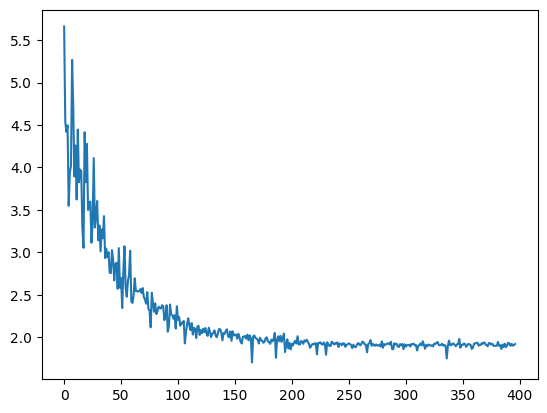

In [68]:
plt.plot(hehe[3:])

100%|██████████| 400/400 [00:05<00:00, 76.75it/s]


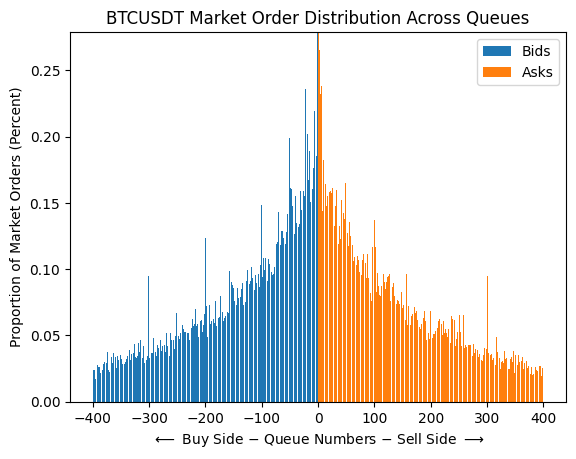

In [37]:
num_bids = np.array([sum(queue_infos['BTCUSDT']['event_sizes']['market']['bid'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))])
num_asks = np.array([sum(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))])
tot_orders = num_bids.sum() + num_asks.sum()
prob_bids = num_bids[::-1] / tot_orders
prob_asks = num_asks / tot_orders
plt.bar(np.arange(-MAX_QNS['BTCUSDT'], 0), prob_bids * 100, label='Bids')
plt.bar(np.arange(1, MAX_QNS['BTCUSDT']+1), prob_asks * 100, label='Asks')
plt.ylim(0, np.max(np.concatenate([prob_bids[:-2], prob_asks[2:]]))*100)
plt.xlabel('$\longleftarrow$ Buy Side $-$ Queue Numbers $-$ Sell Side $\longrightarrow$')
plt.ylabel('Proportion of Market Orders (Percent)')
plt.title('BTCUSDT Market Order Distribution Across Queues')
plt.legend()

In [38]:
'market'.title()

'Market'

100%|██████████| 150/150 [00:01<00:00, 107.59it/s]


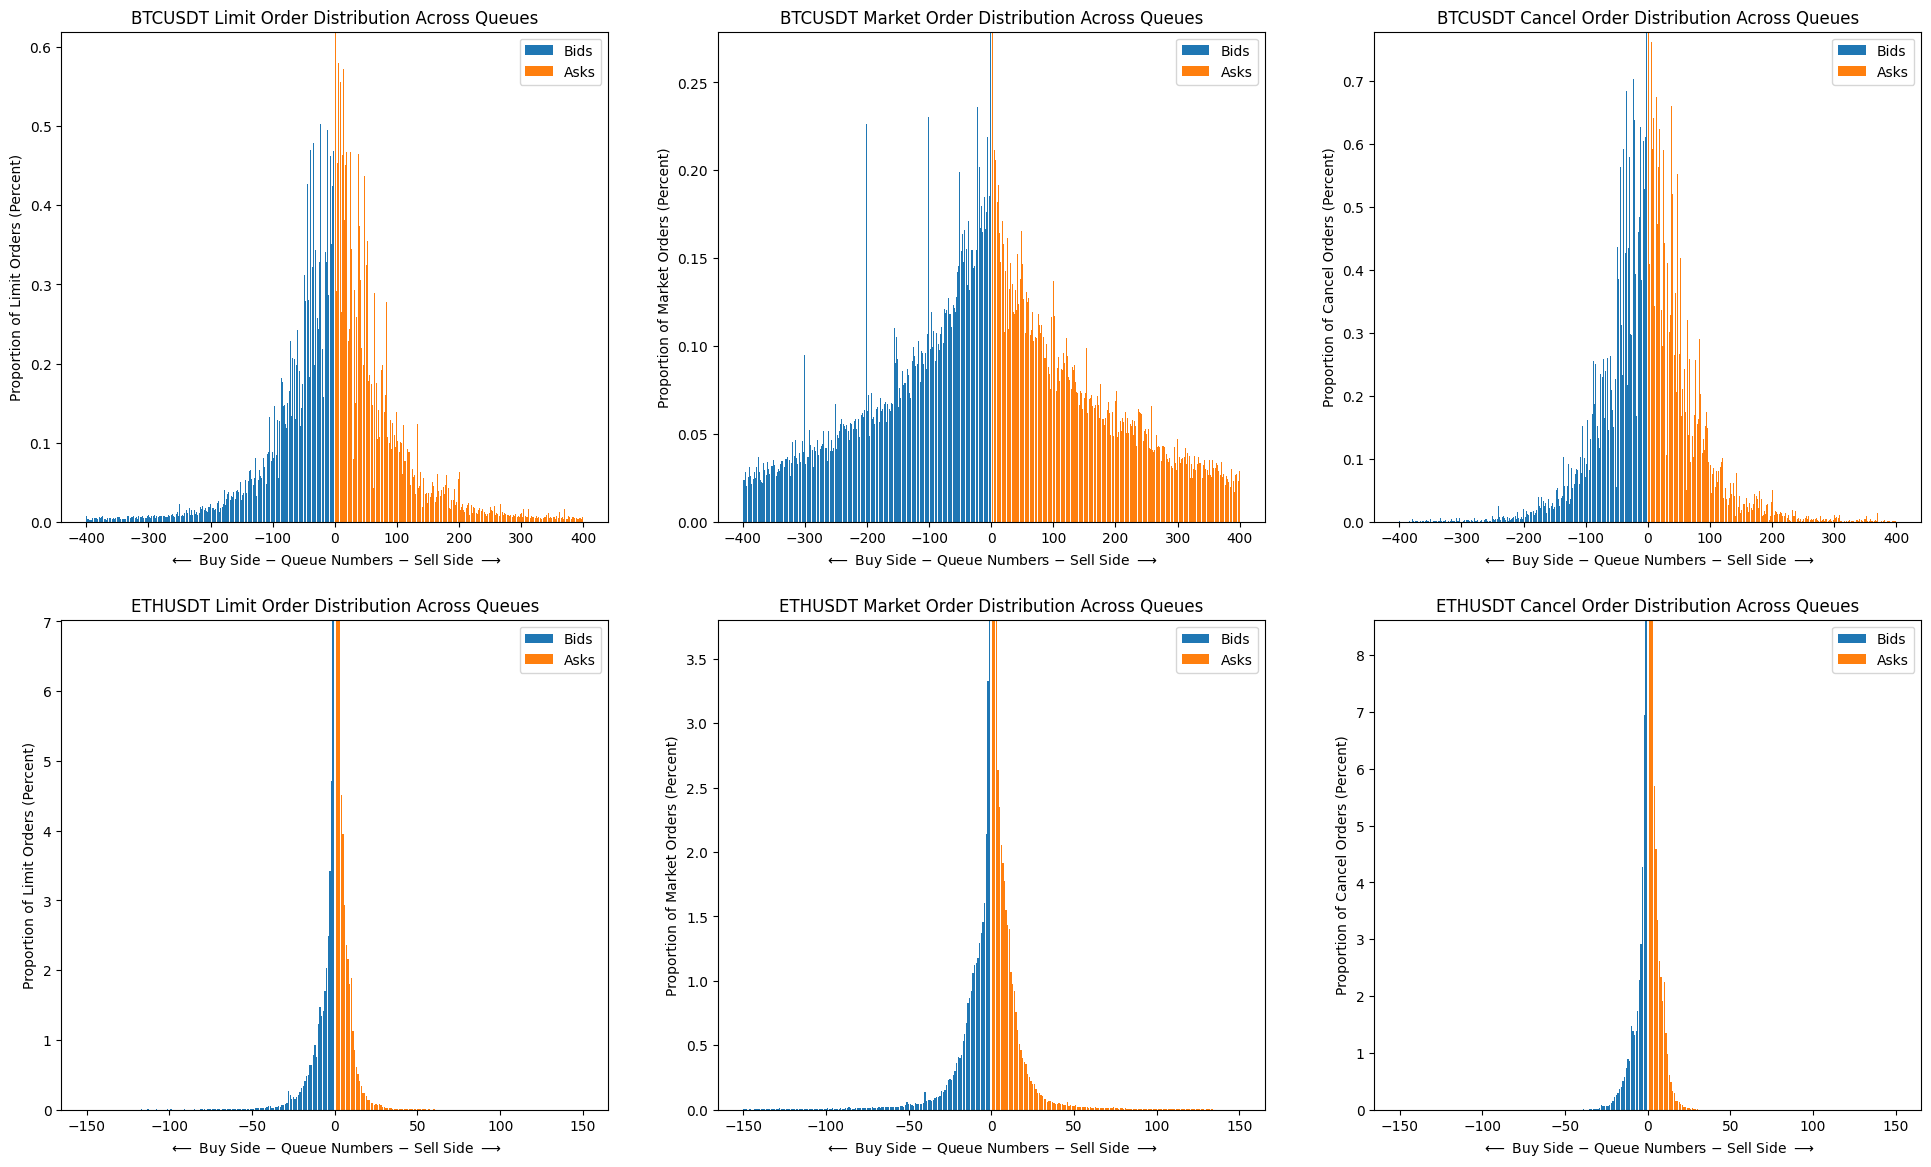

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
for i, crypto_pair in enumerate(CRYPTO_PAIRS):
    for j, ordertype in enumerate(['limit', 'market', 'cancel']):
        num_bids = np.array([sum(queue_infos[crypto_pair]['event_sizes'][ordertype]['bid'][qn]) for qn in tqdm(range(1, MAX_QNS[crypto_pair]+1))])
        num_asks = np.array([sum(queue_infos[crypto_pair]['event_sizes'][ordertype]['ask'][qn]) for qn in tqdm(range(1, MAX_QNS[crypto_pair]+1))])
        tot_orders = num_bids.sum() + num_asks.sum()
        prob_bids = num_bids[::-1] / tot_orders
        prob_asks = num_asks / tot_orders
        axes[i,j].bar(np.arange(-MAX_QNS[crypto_pair], 0), prob_bids * 100, label='Bids')
        axes[i,j].bar(np.arange(1, MAX_QNS[crypto_pair]+1), prob_asks * 100, label='Asks')
        axes[i,j].set_ylim(0, np.max(np.concatenate([prob_bids[:-2], prob_asks[2:]]))*100)
        axes[i,j].set_xlabel('$\longleftarrow$ Buy Side $-$ Queue Numbers $-$ Sell Side $\longrightarrow$')
        axes[i,j].set_ylabel(f'Proportion of {ordertype.title()} Orders (Percent)')
        axes[i,j].set_title(f'{crypto_pair} {ordertype.title()} Order Distribution Across Queues')
        axes[i,j].legend()
plt.show()

100%|██████████| 400/400 [00:05<00:00, 77.82it/s]


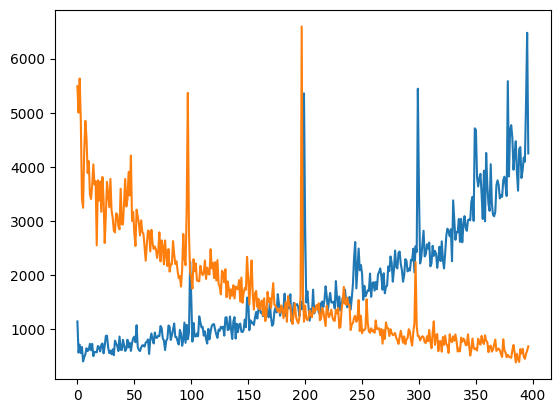

In [14]:
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['market']['bid'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[::-1][:-3])
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[3:])

100%|██████████| 400/400 [00:05<00:00, 75.16it/s]


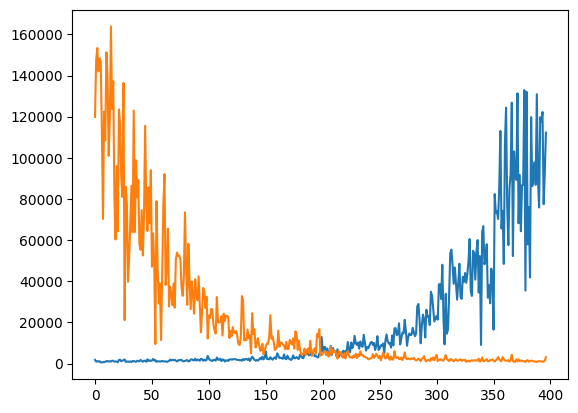

In [17]:
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['limit']['bid'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[::-1][:-3])
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['limit']['ask'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[3:])

100%|██████████| 400/400 [00:04<00:00, 89.04it/s]


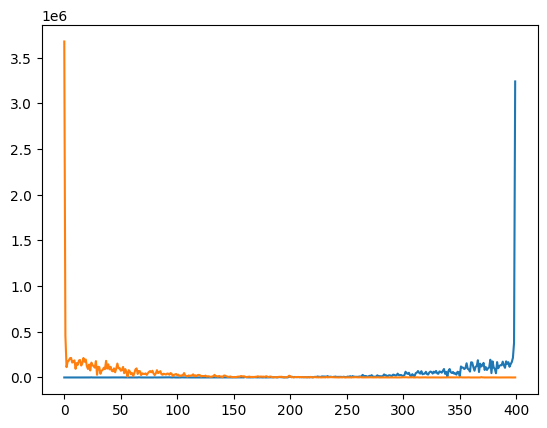

In [20]:
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['cancel']['bid'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[::-1][:])
hehe = [sum(queue_infos['BTCUSDT']['event_sizes']['cancel']['ask'][qn]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))]
plt.plot(hehe[:])

In [6]:
sum([len(np.array(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn])[np.array(queue_infos['BTCUSDT']['event_sizes']['market']['ask'][qn]) != 0]) for qn in tqdm(range(1, MAX_QNS['BTCUSDT']+1))])

100%|██████████| 400/400 [00:09<00:00, 41.78it/s]


404934

In [51]:
queue_rates = {
    crypto_pair: {
        'limit': {'ask': dict(), 'bid': dict()},
        'market': {'ask': dict(), 'bid': dict()},
        'cancel': {'ask': dict(), 'bid': dict()}
    } for crypto_pair in CRYPTO_PAIRS
}

queue_tot_times_vols = {
    crypto_pair: {
        'limit': {'ask': {'tot_time': dict(), 'tot_orders': dict()}, 'bid': {'tot_time': dict(), 'tot_orders': dict()}},
        'market': {'ask': {'tot_time': dict(), 'tot_orders': dict()}, 'bid': {'tot_time': dict(), 'tot_orders': dict()}},
        'cancel': {'ask': {'tot_time': dict(), 'tot_orders': dict()}, 'bid': {'tot_time': dict(), 'tot_orders': dict()}}
    } for crypto_pair in CRYPTO_PAIRS
}


In [52]:
for crypto_pair in CRYPTO_PAIRS:
    print(f'Computing Rates for {crypto_pair}...')
    for ordertype in ['limit', 'market', 'cancel']:
        for side in ['bid', 'ask']:
            for qn in tqdm(range(1, MAX_QNS[crypto_pair]+1)):
                temp = pd.Series(queue_infos[crypto_pair]['event_times'][ordertype][side][qn]) - pd.Series(queue_infos[crypto_pair]['event_times'][ordertype][side][qn]).shift()
                temp = (temp.dt.total_seconds() * 1000)
                temp[temp == 0] = np.nan
                temp.ffill(inplace=True)
                temp1 = np.array(queue_infos[crypto_pair]['event_sizes'][ordertype][side][qn])
                temp.iloc[np.where(temp1 == 0)[0]] = 0
                queue_tot_times_vols[crypto_pair][ordertype][side]['tot_time'][qn] = temp.sum()
                queue_tot_times_vols[crypto_pair][ordertype][side]['tot_orders'][qn] = temp1.sum()
                queue_rates[crypto_pair][ordertype][side][qn] = queue_tot_times_vols[crypto_pair][ordertype][side]['tot_orders'][qn] / queue_tot_times_vols[crypto_pair][ordertype][side]['tot_time'][qn]


Computing Rates for BTCUSDT...


 82%|████████▏ | 327/400 [02:50<00:37,  1.92it/s]/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_99720/1750848036.py:14: RuntimeWarning: invalid value encountered in scalar divide
  queue_rates[crypto_pair][ordertype][side][qn] = queue_tot_times_vols[crypto_pair][ordertype][side]['tot_orders'][qn] / queue_tot_times_vols[crypto_pair][ordertype][side]['tot_time'][qn]
100%|██████████| 400/400 [03:28<00:00,  1.92it/s]


Computing Rates for ETHUSDT...


100%|██████████| 150/150 [01:11<00:00,  2.08it/s]


(array([3.579e+03, 3.140e+02, 2.290e+02, 1.960e+02, 5.900e+01, 4.100e+01,
        2.900e+01, 2.800e+01, 3.300e+01, 1.200e+01, 8.000e+00, 3.700e+01,
        1.200e+01, 9.000e+00, 9.000e+00, 5.000e+00, 1.000e+01, 1.100e+01,
        4.000e+00, 6.000e+00, 8.000e+00, 4.000e+00, 5.000e+00, 5.000e+00,
        6.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

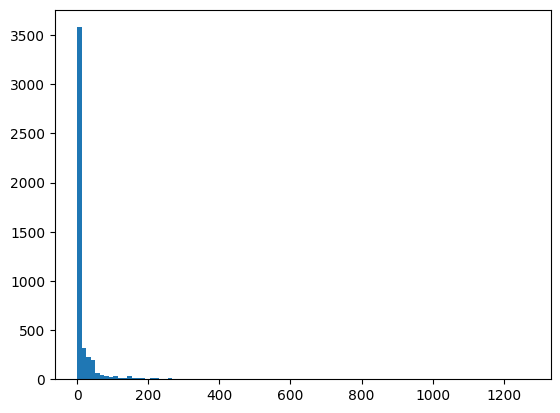

In [57]:
plt.hist(np.array(queue_infos['BTCUSDT']['event_sizes']['limit']['bid'][2])[np.array(queue_infos['BTCUSDT']['event_sizes']['limit']['bid'][2]) != 0], bins=100)

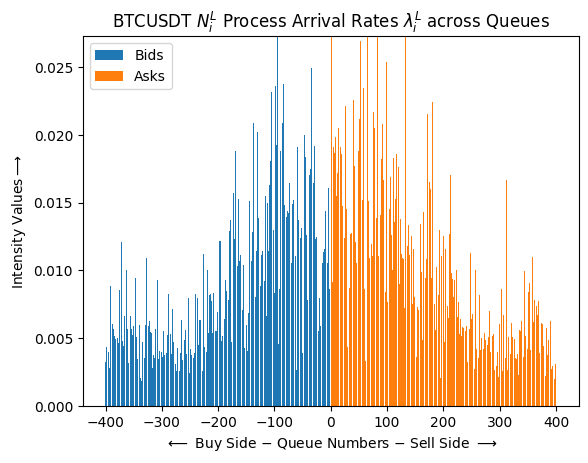

In [44]:
bid_rates = np.array(list(queue_rates['BTCUSDT']['limit']['bid'].values()))[::-1]
ask_rates = np.array(list(queue_rates['BTCUSDT']['limit']['ask'].values()))
plt.bar(-np.array(list(queue_rates['BTCUSDT']['limit']['bid'].keys()))[::-1], bid_rates, label='Bids')
plt.bar(np.array(list(queue_rates['BTCUSDT']['limit']['ask'].keys())), ask_rates, label='Asks')
plt.ylim(0, np.quantile(np.concatenate([bid_rates[:-2], ask_rates[2:]]), 0.99))
plt.xlabel('$\longleftarrow$ Buy Side $-$ Queue Numbers $-$ Sell Side $\longrightarrow$')
plt.ylabel('Intensity Values$\longrightarrow$')
plt.title("BTCUSDT $N_i^L$ Process Arrival Rates $\lambda_i^L$ across Queues")
plt.legend()

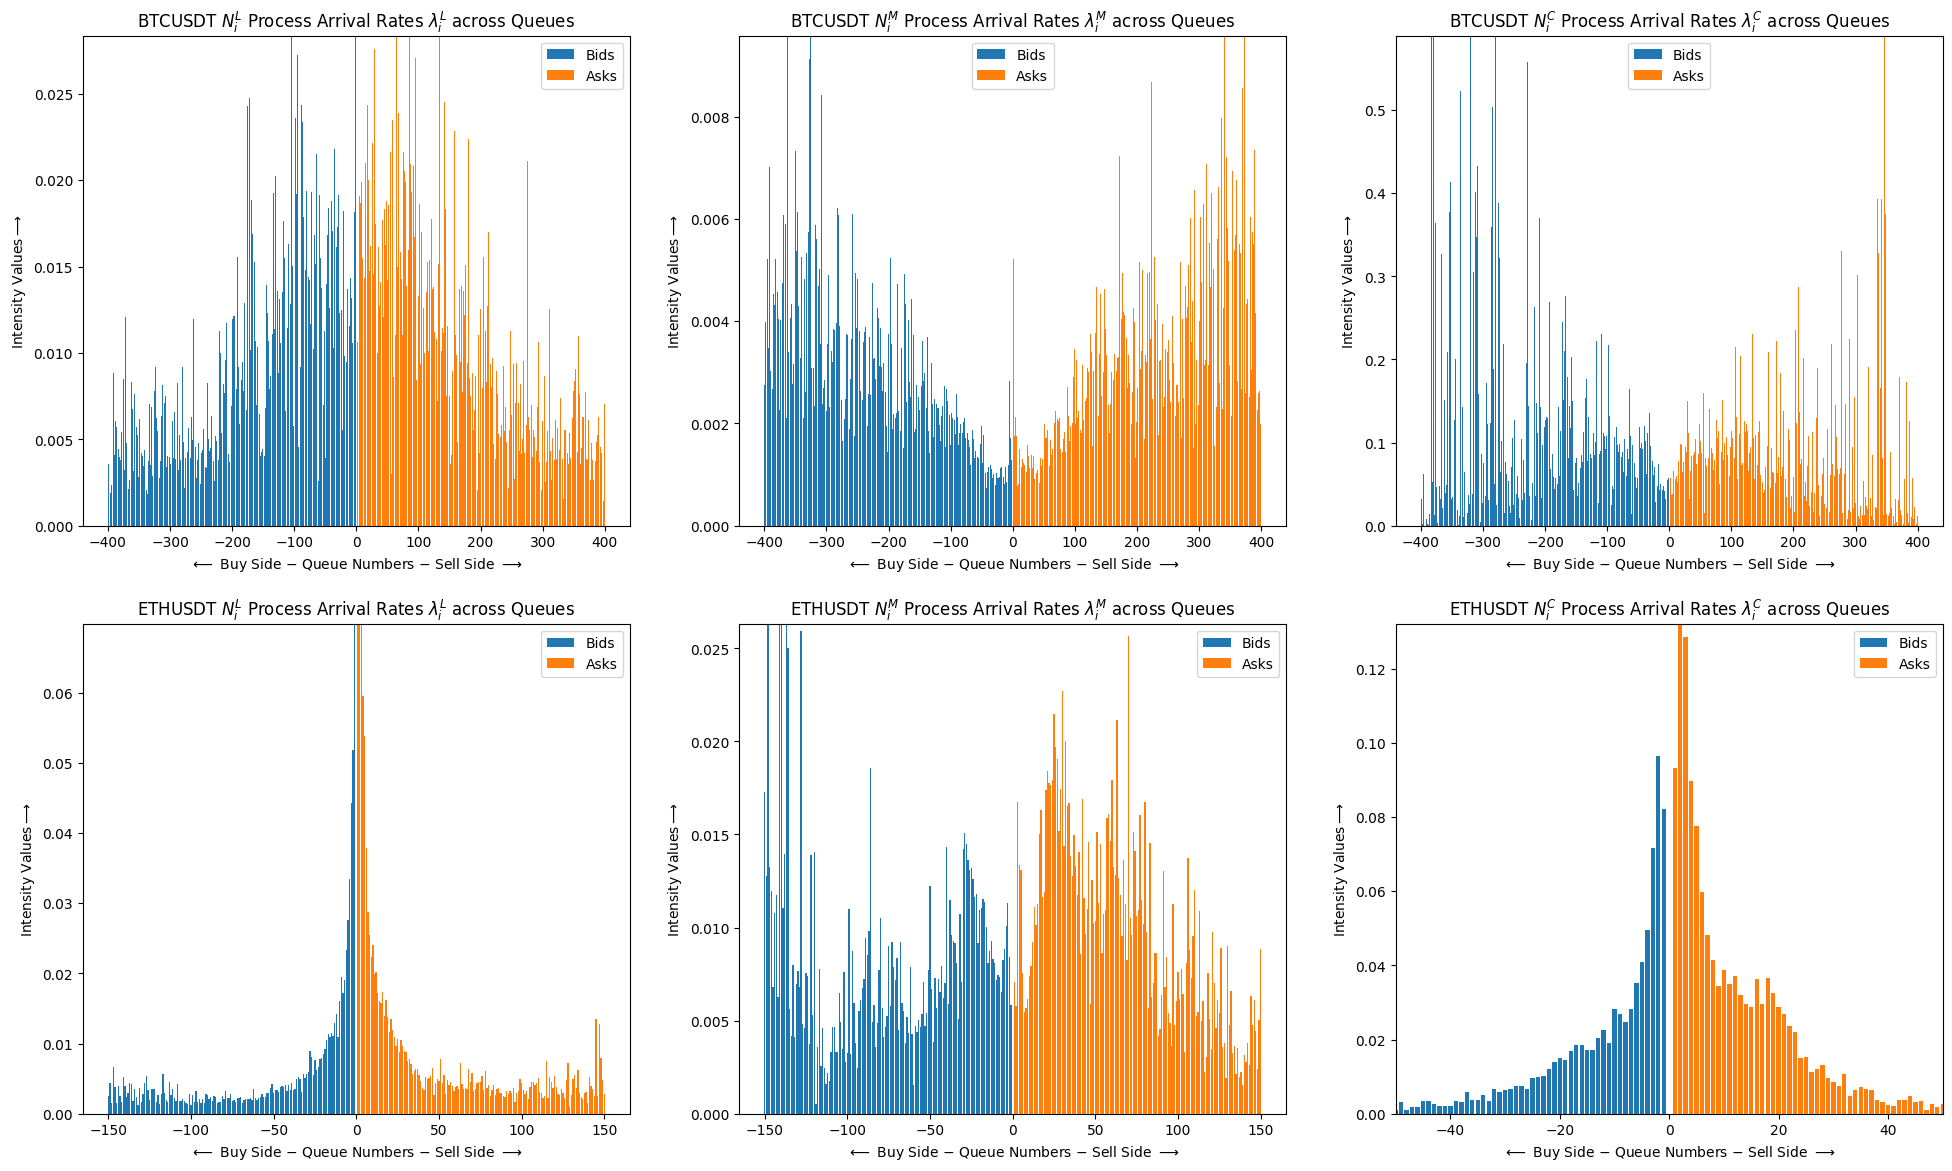

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
for i, crypto_pair in enumerate(CRYPTO_PAIRS):
    for j, ordertype in enumerate(['limit', 'market', 'cancel']):
        bid_rates = np.array(list(queue_rates[crypto_pair][ordertype]['bid'].values()))[::-1]
        ask_rates = np.array(list(queue_rates[crypto_pair][ordertype]['ask'].values()))
        axes[i,j].bar(-np.array(list(queue_rates[crypto_pair][ordertype]['bid'].keys()))[::-1], bid_rates, label='Bids')
        axes[i,j].bar(np.array(list(queue_rates[crypto_pair][ordertype]['ask'].keys())), ask_rates, label='Asks')
        if i == 1 and j == 2:
            axes[i,j].set_xlim(-50,50)
            axes[i,j].set_ylim(0, np.quantile(np.concatenate([bid_rates[~np.isnan(bid_rates)], ask_rates[~np.isnan(ask_rates)]]), 0.87))
        else:
            axes[i,j].set_ylim(0, np.quantile(np.concatenate([bid_rates[~np.isnan(bid_rates)], ask_rates[~np.isnan(ask_rates)]]), 0.99))
        axes[i,j].set_xlabel('$\longleftarrow$ Buy Side $-$ Queue Numbers $-$ Sell Side $\longrightarrow$')
        axes[i,j].set_ylabel('Intensity Values$\longrightarrow$')
        axes[i,j].set_title(f"{crypto_pair} $N_i^{ordertype[0].upper()}$ Process Arrival Rates $\lambda_i^{ordertype[0].upper()}$ across Queues")
        axes[i,j].legend()
plt.show()

In [ ]:
queue_tot_times_vols['BTCUSDT']['limit']['bid']['tot_orders']

548591.0

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
for i, crypto_pair in enumerate(CRYPTO_PAIRS):
    for j, ordertype in enumerate(['limit', 'market', 'cancel']):
        axes[i,j].bar(-np.array(list(queue_rates[crypto_pair][ordertype]['bid'].keys())), list(queue_rates[crypto_pair][ordertype]['bid'].values()), label='Bids')
        axes[i,j].bar(list(queue_rates[crypto_pair][ordertype]['ask'].keys()), list(queue_rates[crypto_pair][ordertype]['ask'].values()), label='Asks')
        axes[i,j].legend()

In [40]:
data['REFPRICE']['BTCUSDT']

,rp,trade
timestamp,,
2025-02-09 07:12:01.814,9698999.5,0
2025-02-09 07:12:01.914,9698999.5,0
2025-02-09 07:12:02.014,9698999.5,0
2025-02-09 07:12:02.067,9698999.5,1
2025-02-09 07:12:02.069,9698999.5,1
...,...,...
2025-02-10 01:29:51.014,9620000.5,0
2025-02-10 01:29:51.114,9620000.5,0
2025-02-10 01:29:51.214,9620000.5,0


In [32]:
data['DEPTH']['BTCUSDT'].query('bv1 == 5')

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:13:15.414,-1,-2,-13,-14,-15,-44,-48,-93,-113,-124,5,1,1,2,14,1,1,1,1,1,1,2,47,84,147,151,178,199,200,201,911,1,72,1,1,1,1,66,260,219
2025-02-09 07:13:15.514,-1,-2,-13,-14,-15,-44,-48,-93,-113,-124,5,1,1,2,14,1,1,1,1,1,1,2,47,84,147,151,178,199,200,201,937,1,72,1,1,1,1,66,260,219
2025-02-09 07:13:22.814,-1,-2,-13,-14,-15,-44,-48,-64,-84,-93,5,1,1,2,14,1,1,1,1,1,1,2,46,47,84,147,151,178,200,1428,700,1,1,72,1,1,1,1,243,1
2025-02-09 07:13:22.914,-1,-2,-13,-14,-15,-44,-48,-64,-84,-93,5,1,1,2,14,1,1,1,1,1,1,2,46,47,84,147,151,178,200,1428,700,1,1,72,1,1,1,1,243,1
2025-02-09 07:20:07.214,-1,-51,-69,-87,-106,-128,-129,-130,-131,-140,5,1,1,1,1,1,1,1,1,1,1,2,33,34,67,86,97,105,106,107,821,1,1,40,1,1,1,1,305,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:28:49.514,-1,-28,-37,-38,-85,-156,-157,-158,-204,-219,5,1,1,1,1,1,38,1,1,1,1,2,9,12,14,43,44,45,107,108,714,1,1,1,1,1,49,1,1,120
2025-02-10 01:28:53.614,-1,-5,-24,-28,-29,-74,-94,-95,-101,-139,5,1,1,1,1,1,1,2,1,1,1,2,74,92,104,105,106,185,186,706,794,1,1,1,1,28,43,1,91,5
2025-02-10 01:28:53.814,-1,-5,-24,-28,-29,-74,-94,-95,-101,-139,5,1,1,1,1,1,1,2,1,1,1,2,74,92,104,105,106,184,185,506,753,1,1,1,1,1,43,1,63,11


In [26]:
data['REFPRICE']['BTCUSDT'].loc['2025-02-09 7:12:08']

,rp,trade
timestamp,,
2025-02-09 07:12:08.014,9698999.5,0
2025-02-09 07:12:08.020,9698999.5,1
2025-02-09 07:12:08.026,9698999.5,1
2025-02-09 07:12:08.114,9698999.5,0
2025-02-09 07:12:08.214,9698999.5,0
2025-02-09 07:12:08.314,9698999.5,0
2025-02-09 07:12:08.393,9698999.5,1
2025-02-09 07:12:08.414,9698999.5,0
2025-02-09 07:12:08.514,9698999.5,0


In [25]:
data['RDEPTH']['BTCUSDT'].loc['2025-02-09 7:12:08']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:08.020,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1335,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,45,47,48,55,67,77,0,0,0,0,0,0,0,0,0,0,2656,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:08.026,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1335,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,45,47,48,55,67,77,0,0,0,0,0,0,0,0,0,0,2656,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:08.393,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1335,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,45,47,48,55,67,77,0,0,0,0,0,0,0,0,0,0,2656,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [34]:
data['RDEPTH']['BTCUSDT'].loc['2025-02-09 07:12:02']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:02.067,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2675,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.069,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.071,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.464,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0


In [35]:
data['TRADE']['BTCUSDT'].loc['2025-02-09 07:12:02']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,1,1,0
2025-02-09 07:12:02.069,1,3,0
2025-02-09 07:12:02.071,-1,1,1
2025-02-09 07:12:02.464,1,2,0


In [36]:
data['TRADE']['BTCUSDT'].query('q!=1')

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.069,1,3,0
2025-02-09 07:12:02.464,1,2,0
2025-02-09 07:12:03.255,1,3,0
2025-02-09 07:12:04.300,-1,3,1
2025-02-09 07:12:04.734,-1,2,1
...,...,...,...
2025-02-10 01:29:46.234,1,2,0
2025-02-10 01:29:48.038,1,3,0
2025-02-10 01:29:48.316,-1,7,1


In [ ]:
data['TRADE']['BTCUSDT'].query('q==1')

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,1,1,0
2025-02-09 07:12:02.071,-1,1,1
2025-02-09 07:12:03.252,1,1,0
2025-02-09 07:12:03.373,1,1,0
2025-02-09 07:12:03.751,1,1,0
...,...,...,...
2025-02-10 01:29:48.528,-176,1,1
2025-02-10 01:29:49.639,-1,1,1
2025-02-10 01:29:49.970,1,1,0


In [24]:
data['TRADE']['BTCUSDT'].loc['2025-02-09 7:12:08']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:08.020,1,1,0
2025-02-09 07:12:08.026,1,1,0
2025-02-09 07:12:08.393,1,1,0


In [22]:
queue_infos['BTCUSDT']['event_times']['market']['ask'][1][:100]

[numpy.datetime64('2025-02-09T07:12:01.814000000'),
 numpy.datetime64('2025-02-09T07:12:02.069000000'),
 numpy.datetime64('2025-02-09T07:12:02.464000000'),
 numpy.datetime64('2025-02-09T07:12:03.255000000'),
 numpy.datetime64('2025-02-09T07:12:03.751000000'),
 numpy.datetime64('2025-02-09T07:12:06.014000000'),
 numpy.datetime64('2025-02-09T07:12:06.336000000'),
 numpy.datetime64('2025-02-09T07:12:06.398000000'),
 numpy.datetime64('2025-02-09T07:12:06.512000000'),
 numpy.datetime64('2025-02-09T07:12:07.010000000'),
 numpy.datetime64('2025-02-09T07:12:09.254000000'),
 numpy.datetime64('2025-02-09T07:12:09.279000000'),
 numpy.datetime64('2025-02-09T07:12:09.664000000'),
 numpy.datetime64('2025-02-09T07:12:10.521000000'),
 numpy.datetime64('2025-02-09T07:12:10.521000000'),
 numpy.datetime64('2025-02-09T07:12:10.521000000'),
 numpy.datetime64('2025-02-09T07:12:10.667000000'),
 numpy.datetime64('2025-02-09T07:12:10.674000000'),
 numpy.datetime64('2025-02-09T07:12:10.675000000'),
 numpy.datet

In [21]:
queue_infos['BTCUSDT']['event_sizes']['market']['ask'][1][:100]

[0,
 3,
 2,
 3,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 2,
 5,
 165,
 7,
 3,
 58,
 29,
 72,
 50,
 49,
 5,
 11,
 27,
 9,
 7,
 7,
 4,
 2,
 6,
 5,
 139,
 2,
 3,
 5,
 2,
 5,
 2,
 5,
 7,
 4,
 60,
 4,
 10,
 8,
 12,
 5,
 13,
 129,
 6,
 3,
 146,
 2,
 3,
 1,
 3,
 4,
 2,
 3,
 2,
 2,
 3,
 9,
 5,
 2,
 8,
 3,
 2,
 4,
 2,
 2,
 2,
 30,
 3,
 1,
 38,
 3,
 1,
 6,
 1,
 3,
 6,
 12,
 4,
 3,
 1,
 5,
 2,
 2,
 9,
 4,
 3,
 4,
 5,
 113]

In [19]:
queue_rates['BTCUSDT']['market']['ask'][1] * 100

0.5209897168867025

<BarContainer object of 100 artists>

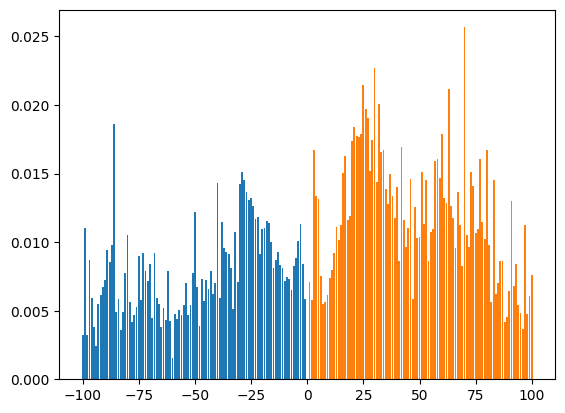

In [15]:
plt.bar(-np.array(list(queue_rates['ETHUSDT']['market']['bid'].keys()))[:100], list(queue_rates['ETHUSDT']['market']['bid'].values())[:100], label='Bids')
plt.bar(list(queue_rates['ETHUSDT']['market']['ask'].keys())[:100], list(queue_rates['ETHUSDT']['market']['ask'].values())[:100], label='Asks')

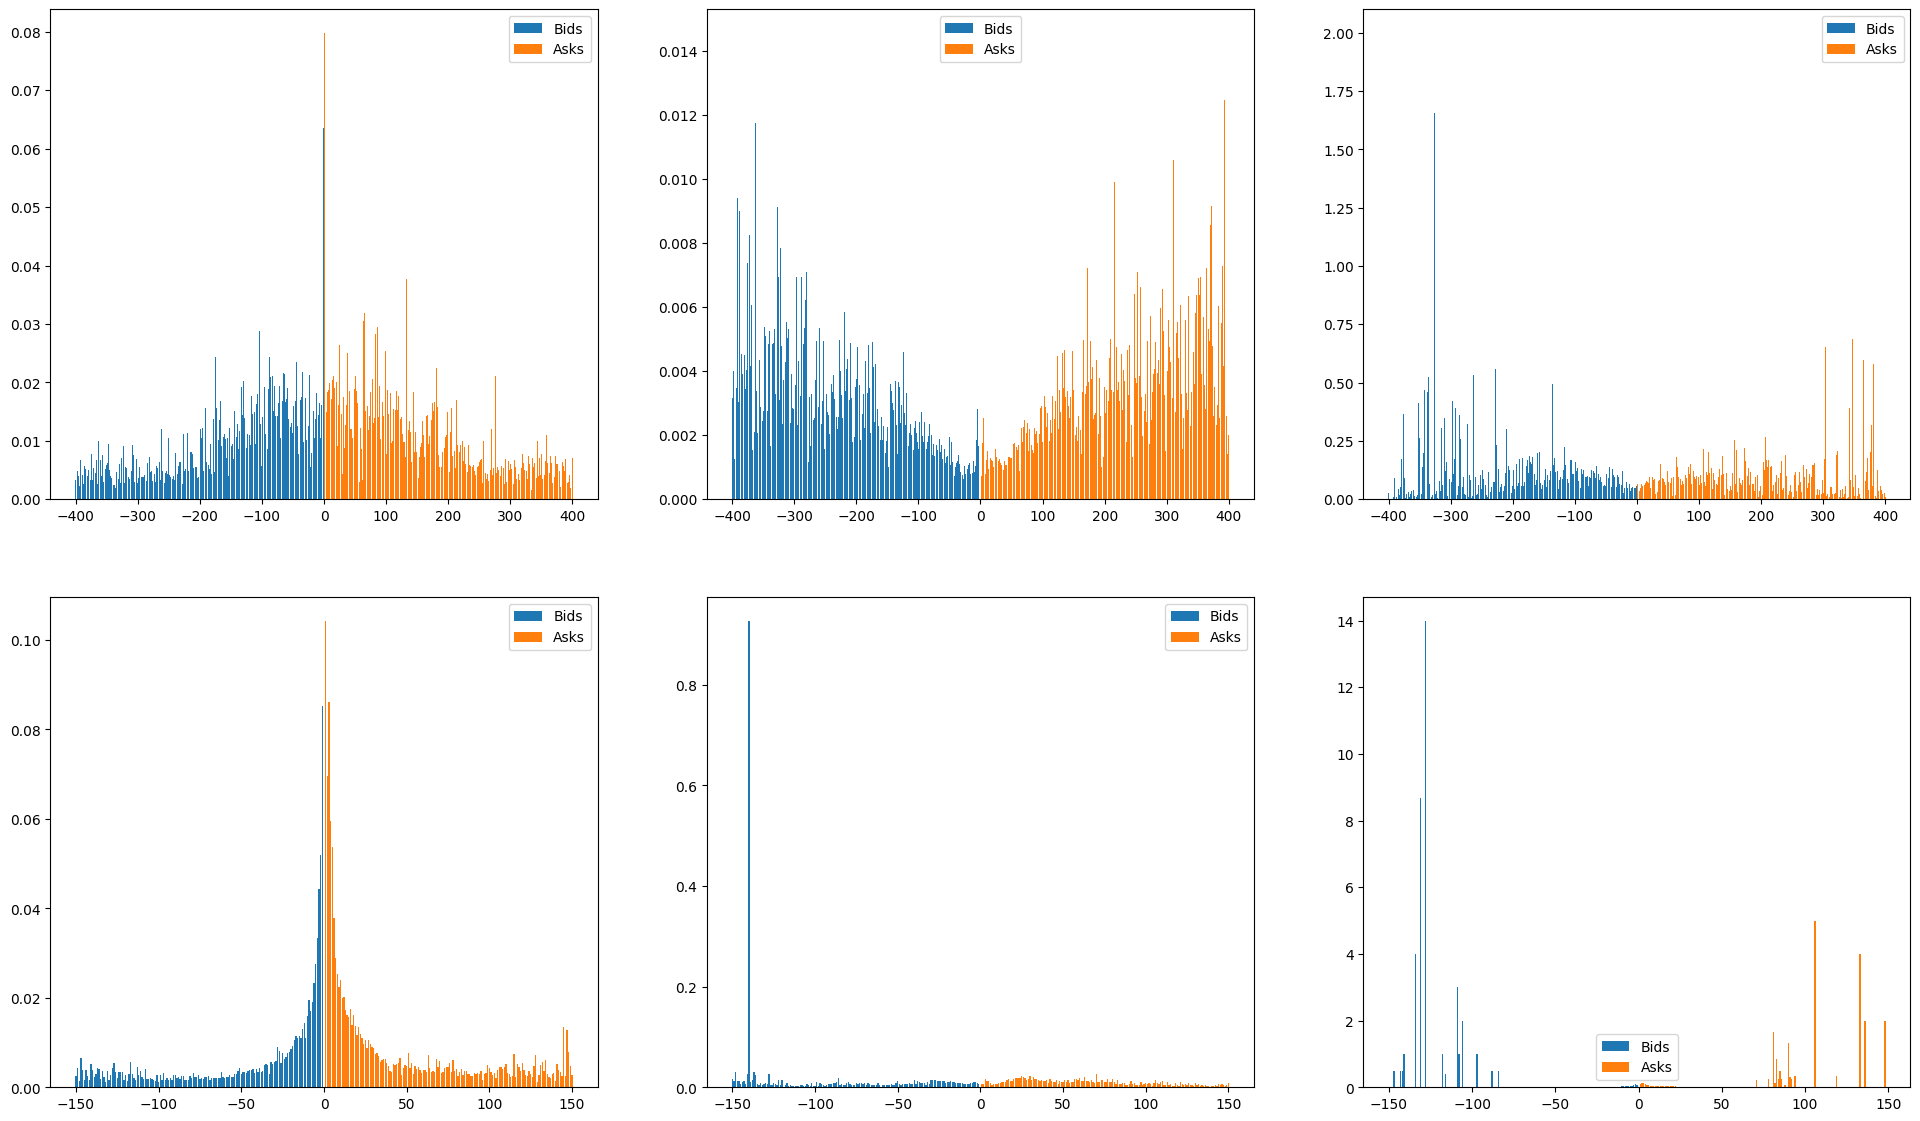

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
for i, crypto_pair in enumerate(CRYPTO_PAIRS):
    for j, ordertype in enumerate(['limit', 'market', 'cancel']):
        axes[i,j].bar(-np.array(list(queue_rates[crypto_pair][ordertype]['bid'].keys())), list(queue_rates[crypto_pair][ordertype]['bid'].values()), label='Bids')
        axes[i,j].bar(list(queue_rates[crypto_pair][ordertype]['ask'].keys()), list(queue_rates[crypto_pair][ordertype]['ask'].values()), label='Asks')
        axes[i,j].legend()

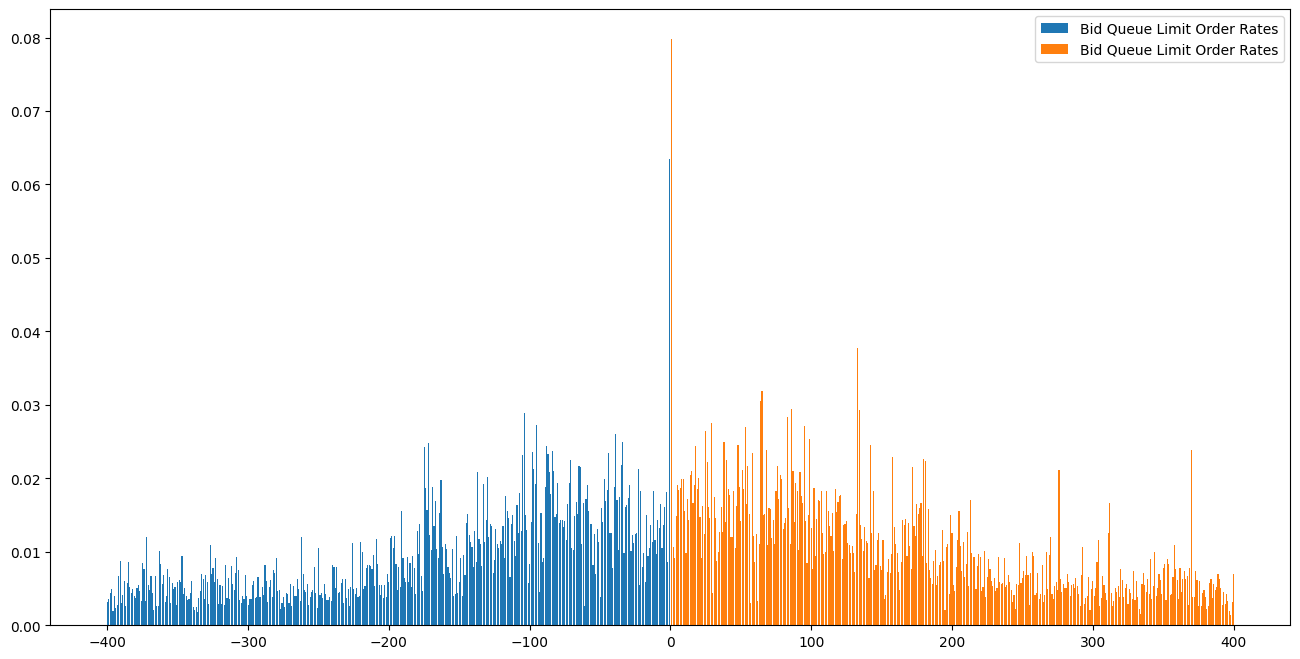

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(-np.array(list(queue_rates['BTCUSDT']['limit']['bid'].keys())), queue_rates['BTCUSDT']['limit']['bid'].values(), label='Bids')
plt.bar(queue_rates['BTCUSDT']['limit']['ask'].keys(), queue_rates['BTCUSDT']['limit']['ask'].values(), label='Asks')
plt.legend()

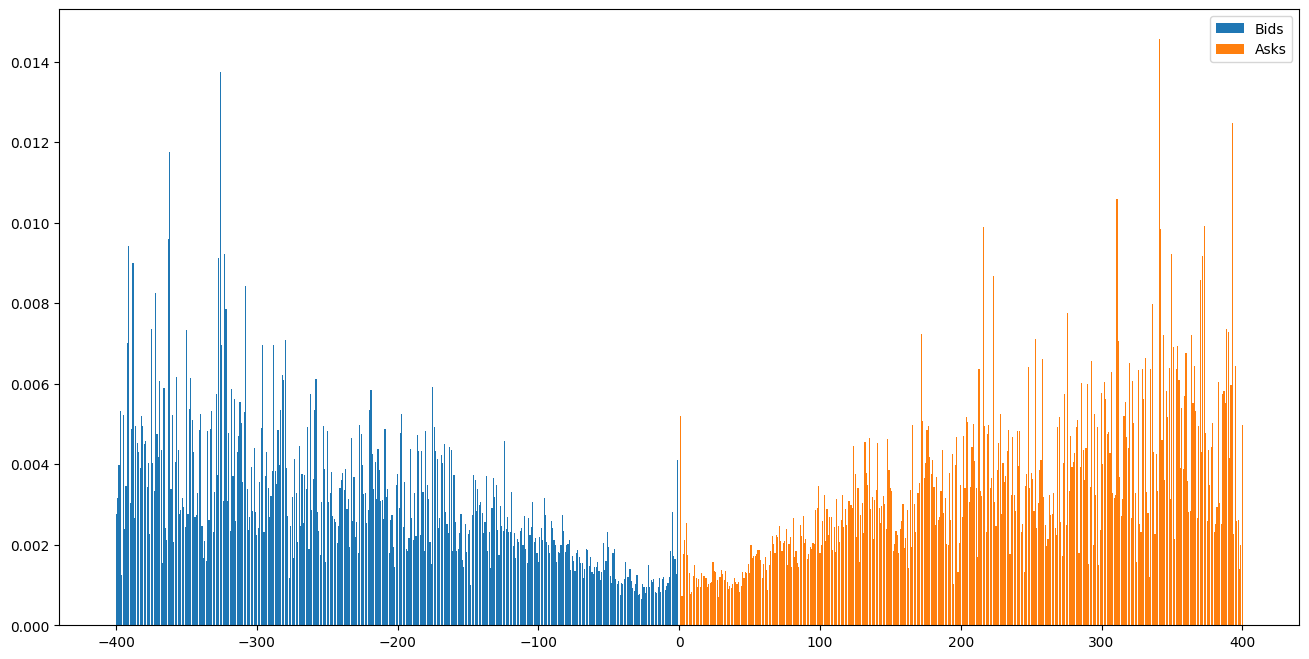

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(-np.array(list(queue_rates['BTCUSDT']['market']['bid'].keys())), queue_rates['BTCUSDT']['market']['bid'].values(), label='Bids')
plt.bar(queue_rates['BTCUSDT']['market']['ask'].keys(), queue_rates['BTCUSDT']['market']['ask'].values(), label='Asks')
plt.legend()

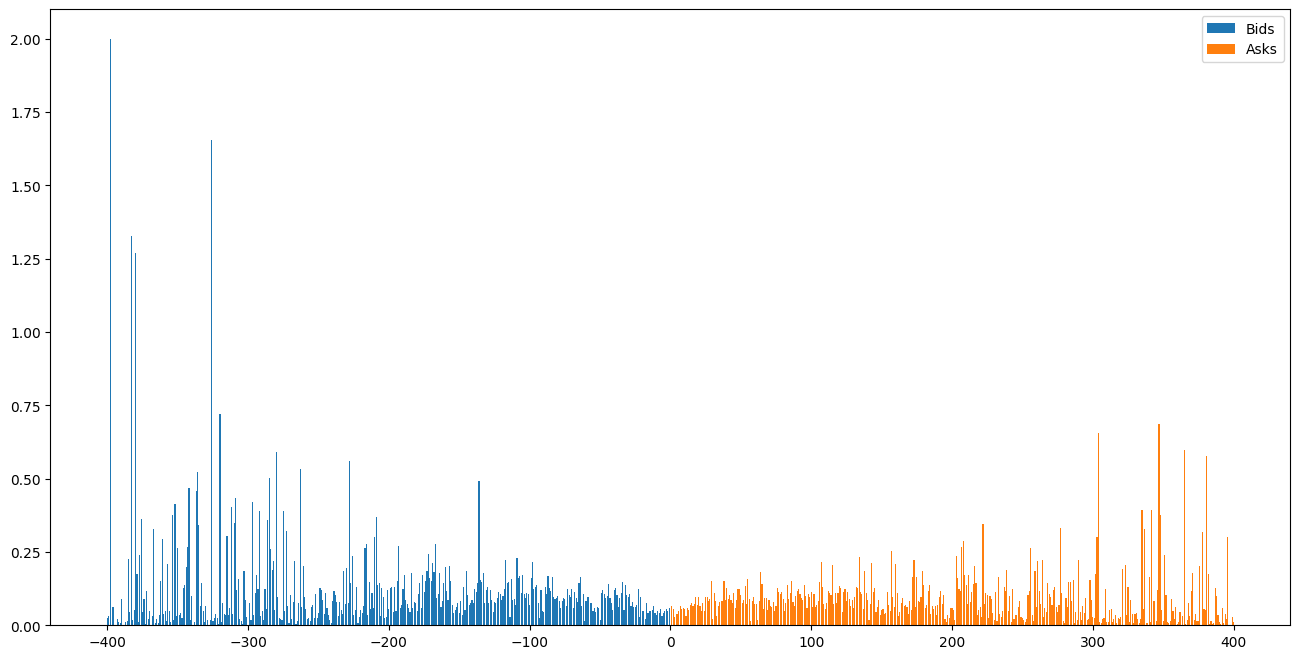

In [34]:
plt.figure(figsize=(16,8))
plt.bar(-np.array(list(queue_rates['BTCUSDT']['cancel']['bid'].keys())), queue_rates['BTCUSDT']['cancel']['bid'].values(), label='Bids')
plt.bar(queue_rates['BTCUSDT']['cancel']['ask'].keys(), queue_rates['BTCUSDT']['cancel']['ask'].values(), label='Asks')
plt.legend()

In [31]:
queue_rates['BTCUSDT']['limit']['ask']

{1: 0.0798496349533139,
 2: 0.010655339181436987,
 3: 0.009120699865429585,
 4: 0.014871337801228346,
 5: 0.019071622364051192,
 6: 0.018423548220676583,
 7: 0.01867514909030846,
 8: 0.01987033693937149,
 9: 0.01991214869811905,
 10: 0.015486050174022329,
 11: 0.009850341150737303,
 12: 0.017200873985038872,
 13: 0.014308931585783832,
 14: 0.02047268576698392,
 15: 0.021016709998484116,
 16: 0.016616066306908945,
 17: 0.01910403404975861,
 18: 0.024377820807809567,
 19: 0.018573437906879167,
 20: 0.019999233745833494,
 21: 0.01476733253162182,
 22: 0.009110362158765576,
 23: 0.016184393439744895,
 24: 0.01236141783306417,
 25: 0.026422028315777744,
 26: 0.022161845005175054,
 27: 0.01604355266320337,
 28: 0.014555427571186415,
 29: 0.027582030601349755,
 30: 0.004328855178999023,
 31: 0.017489515201127494,
 32: 0.0146454117764219,
 33: 0.008720385092767183,
 34: 0.009994863258707628,
 35: 0.012714227681220446,
 36: 0.016144371848708466,
 37: 0.012738119513163016,
 38: 0.024961998194431

In [19]:
ordertype = 'limit'
side = 'bid'
limit_bid_rates = dict()
for qn in tqdm(timers[ordertype][side]):
    temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()
    temp = (temp.dt.total_seconds() * 1000)
    temp[temp == 0] = np.nan
    temp.ffill(inplace=True)
    temp1 = np.array(event_sizes[ordertype][side][qn])
    temp.iloc[np.where(temp1 == 0)[0]] = 0
    limit_bid_rates[qn] = temp1.sum() / temp.sum()

 22%|██▏       | 40/184 [00:22<01:20,  1.78it/s]


KeyboardInterrupt: 

In [18]:
# # stores the info about the event times and sizes for each crypto pair
# queue_infos = {crypto_pair: {'event_times': None, 'event_sizes': None} for crypto_pair in CRYPTO_PAIRS}

# for crypto_pair in CRYPTO_PAIRS:
        
#     # maintains the queue size for each queue number
#     queues = {
#         'bid': np.zeros(MAX_ATS_QN[crypto_pair]+1, np.int64),
#         'ask': np.zeros(MAX_ATS_QN[crypto_pair]+1, np.int64),
#     }
#     # stores the event sizes
#     event_sizes = {
#         'limit': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         },
#         'market': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         },
#         'cancel': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         }
#     }
#     # stores the event times
#     timers = {
#         'limit': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         },
#         'market': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         },
#         'cancel': {
#             'bid': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#             'ask': {
#                 qn: list() for qn in range(MAX_ATS_QN[crypto_pair]+1)
#             },
#         }
#     }
#     # # set the starting time for each queue in limit, cancel and market orders as the first time in the LOB snapshot
#     # # and since we do not have any events preceding it we set the event sizes to 0 as a marker for this
#     # for ordertype in ['limit', 'cancel', 'market']:
#     #     for side in ['bid', 'ask']:
#     #         for qn in range(MAX_ATS_QN[crypto_pair]+1):
#     #             timers[ordertype][side][qn].append(data['DEPTH'][crypto_pair].index[0])
#     #             event_sizes[ordertype][side][qn].append(0)

#     # stores the position in the depth and trades data
#     odb_ptr, trade_ptr = 0, 0
#     # stores the prev and current reference price
#     prev_rp = 0
#     curr_rp = data['REFPRICE'][crypto_pair].iloc[odb_ptr + trade_ptr].rp
#     prev_bid_qns = prev_ask_qns = 0

#     for i in tqdm(range(data['DEPTH'][crypto_pair].shape[0] + data['TRADE'][crypto_pair].shape[0])):

#         # get the current reference price
#         curr_rp = data['REFPRICE'][crypto_pair].iloc[odb_ptr + trade_ptr].rp

#         if trade_ptr >= data['TRADE'][crypto_pair].shape[0] or data['DEPTH'][crypto_pair].iloc[odb_ptr].name <= data['TRADE'][crypto_pair].iloc[trade_ptr].name:

#             # current time
#             t = data['DEPTH'][crypto_pair].iloc[odb_ptr].name

#             # print('LOB:', t)

#             # get the queue numbers which might get modified by this LOB snapshot
#             bid_qns = np.abs(data['DEPTH'][crypto_pair].iloc[odb_ptr].loc['bp1':'bp10'])
#             ask_qns = np.abs(data['DEPTH'][crypto_pair].iloc[odb_ptr].loc['ap1':'ap10'])

#             # store the previous state of the queue sizes to compare if there has been any update
#             prev_bid_queues = queues['bid'].copy()
#             prev_ask_queues = queues['ask'].copy()

#             # if the reference price changes then zero out the bid and ask queues and set the time of all the queues to this
#             if curr_rp != prev_rp:
#                 queues['bid'][:] = 0
#                 queues['ask'][:] = 0
#                 # if the reference price has changed market all the queue timers to current time
#                 for ordertype in ['limit', 'cancel', 'market']:
#                     for side in ['bid', 'ask']:
#                         for qn in range(MAX_ATS_QN[crypto_pair]+1):
#                             timers[ordertype][side][qn].append(t)
#                             event_sizes[ordertype][side][qn].append(0)

#             # update the bid and ask queue sizes for this LOB snapshot
#             queues['bid'][bid_qns] = data['DEPTH'][crypto_pair].iloc[odb_ptr].loc['bv1':'bv10']
#             queues['ask'][ask_qns] = data['DEPTH'][crypto_pair].iloc[odb_ptr].loc['av1':'av10']
            
#             # if the reference price hasn't changed
#             if curr_rp == prev_rp:
#                 # update the timers and event sizes of the limit orders for the bid and ask side
#                 bid_diff = queues['bid'] - prev_bid_queues
#                 ask_diff = queues['ask'] - prev_ask_queues
#                 limit_bid_qns = np.where(bid_diff > 0)[0]
#                 limit_ask_qns = np.where(ask_diff > 0)[0]

#                 for qn in limit_bid_qns:
#                     # print('limit', 'bid', qn)
#                     timers['limit']['bid'][qn].append(t)
#                     event_sizes['limit']['bid'][qn].append(bid_diff[qn])
#                 for qn in limit_ask_qns:
#                     # print('limit', 'ask', qn)
#                     timers['limit']['ask'][qn].append(t)
#                     event_sizes['limit']['ask'][qn].append(ask_diff[qn])

#                 # update the timers and event sizes of the cancel orders for the bid and ask side
#                 cancel_bid_qns = np.where(bid_diff < 0)[0]
#                 cancel_ask_qns = np.where(ask_diff < 0)[0]

#                 for qn in cancel_bid_qns:
#                     # print('cancel', 'bid', qn)
#                     timers['cancel']['bid'][qn].append(t)
#                     event_sizes['cancel']['bid'][qn].append(np.abs(bid_diff[qn]))
#                 for qn in cancel_ask_qns:
#                     # print('cancel', 'ask', qn)
#                     timers['cancel']['ask'][qn].append(t)
#                     event_sizes['cancel']['ask'][qn].append(np.abs(ask_diff[qn]))
#             # print('----------------')
#             odb_ptr += 1
        
#         else:

#             # current time
#             t = data['TRADE'][crypto_pair].iloc[trade_ptr].name
#             # print('TRADE:', t)
#             # current trade info
#             curr_trade = data['TRADE'][crypto_pair].iloc[trade_ptr]
#             p = np.abs(curr_trade.loc['p'])
#             q = curr_trade.loc['q']
#             mm_buy = curr_trade.loc['mm_buy']

#             # get the queue numbers which might get modified by this trade
#             bid_qns = np.abs(data['RDEPTH'][crypto_pair].iloc[trade_ptr].loc['bp1':f"bp{data['RDEPTHLEVELS'][crypto_pair]}"])
#             ask_qns = np.abs(data['RDEPTH'][crypto_pair].iloc[trade_ptr].loc['ap1':f"ap{data['RDEPTHLEVELS'][crypto_pair]}"])

#             # store the previous state of the queue sizes to compare if there has been any update
#             prev_bid_queues = queues['bid'].copy()
#             prev_ask_queues = queues['ask'].copy()

#             # if the reference price changes then zero out the bid and ask queues and set the time of all the queues to this
#             if curr_rp != prev_rp:
#                 queues['bid'][:] = 0
#                 queues['ask'][:] = 0
#                 # if the reference price has changed market all the queue timers to current time
#                 for ordertype in ['limit', 'cancel', 'market']:
#                     for side in ['bid', 'ask']:
#                         for qn in range(MAX_ATS_QN[crypto_pair]+1):
#                             timers[ordertype][side][qn].append(t)
#                             event_sizes[ordertype][side][qn].append(0)
            
#             # update the bid and ask queue sizes for this trade
#             queues['bid'][bid_qns] = data['RDEPTH'][crypto_pair].iloc[trade_ptr].loc['bv1':f"bv{data['RDEPTHLEVELS'][crypto_pair]}"]
#             queues['ask'][ask_qns] = data['RDEPTH'][crypto_pair].iloc[trade_ptr].loc['av1':f"av{data['RDEPTHLEVELS'][crypto_pair]}"]

#             # is it a new limit order
#             newlim_order = data['NEWLIM'][crypto_pair].iloc[trade_ptr]

#             # if this is a new limit order, I do not know the queue size at this queue
#             # so I would instead assume that the queue size was exhausted but will update the limit timer
#             if newlim_order.loc['newlim'] > 0:
#                 qn = np.abs(newlim_order.loc['ap1'])
#                 # print('limit', 'ask', qn)
#                 # print('market', 'ask', qn)
#                 timers['limit']['ask'][qn].append(t)
#                 timers['market']['ask'][qn].append(t)
#                 event_sizes['limit']['ask'][qn].append(np.abs(newlim_order.loc['newlim']))
#                 event_sizes['market']['ask'][qn].append(np.abs(newlim_order.loc['newlim']))

#             elif newlim_order.loc['newlim'] < 0:
#                 qn = np.abs(newlim_order.loc['bp1'])
#                 # print('limit', 'bid', qn)
#                 # print('market', 'bid', qn)
#                 timers['limit']['bid'][qn].append(t)
#                 timers['market']['bid'][qn].append(t)
#                 event_sizes['limit']['bid'][qn].append(np.abs(newlim_order.loc['newlim']))
#                 event_sizes['market']['bid'][qn].append(np.abs(newlim_order.loc['newlim']))
            
#             # check for all the queue numbers which had seen cancelled orders before this trade that has resulted in removal of price level
#             bid_cancel_qns = np.abs(data['CANCEL'][crypto_pair].iloc[trade_ptr].loc['bp1':'bp10'])
#             ask_cancel_qns = np.abs(data['CANCEL'][crypto_pair].iloc[trade_ptr].loc['ap1':'ap10'])
#             bid_cancel_qsizes = np.abs(data['CANCEL'][crypto_pair].iloc[trade_ptr].loc['bv1':'bv10'])
#             ask_cancel_qsizes = np.abs(data['CANCEL'][crypto_pair].iloc[trade_ptr].loc['av1':'av10'])
#             non_zero_bid_cancels = np.where(bid_cancel_qns)[0]
#             non_zero_ask_cancels = np.where(ask_cancel_qns)[0]

#             # if the bid cancel queue numbers has non-zero queue number then
#             if non_zero_bid_cancels.shape[0]:
#                 for qn_idx in non_zero_bid_cancels:
#                     if curr_rp != prev_rp:
#                         event_sizes['cancel']['bid'][bid_cancel_qns[qn_idx]].pop()
#                     else:
#                         timers['cancel']['bid'][bid_cancel_qns[qn_idx]].append(t)
#                         # print('cancel', 'bid', bid_cancel_qns[qn_idx])
#                     event_sizes['cancel']['bid'][bid_cancel_qns[qn_idx]].append(bid_cancel_qsizes[qn_idx])
            
#             # if the ask cancel queue numbers has non-zero queue number then
#             if non_zero_ask_cancels.shape[0]:
#                 for qn_idx in non_zero_ask_cancels:
#                     if curr_rp != prev_rp:
#                         event_sizes['cancel']['ask'][ask_cancel_qns[qn_idx]].pop()
#                     else:
#                         timers['cancel']['ask'][ask_cancel_qns[qn_idx]].append(t)
#                     # print('cancel', 'ask', ask_cancel_qns[qn_idx])
#                     event_sizes['cancel']['ask'][ask_cancel_qns[qn_idx]].append(ask_cancel_qsizes[qn_idx])

#             if curr_rp == prev_rp:
#                 # update the timers of the limit orders for the bid and ask side
#                 bid_diff = queues['bid'] - prev_bid_queues
#                 ask_diff = queues['ask'] - prev_ask_queues
#                 # find the market/cancel order queue numbers
#                 market_or_cancel_bid_qns = np.where(bid_diff < 0)[0]
#                 market_or_cancel_ask_qns = np.where(ask_diff < 0)[0]
#                 # if best bid in the difference then the current trade is a market order at the best bid
#                 if mm_buy and p in market_or_cancel_bid_qns:
#                     # print('market', 'bid', p)
#                     timers['market']['bid'][p].append(t)
#                     event_sizes['market']['bid'][p].append(np.abs(bid_diff[p]))

#                 if (not mm_buy) and p in market_or_cancel_ask_qns:
#                     # print('market', 'ask', p)
#                     timers['market']['ask'][p].append(t)
#                     event_sizes['market']['ask'][p].append(np.abs(ask_diff[p]))

#                 # if there are any other changes except for at the best bid/best ask then these are cancel orders
#                 cancel_bid_qns = np.setdiff1d(market_or_cancel_bid_qns, np.array([p]))
#                 cancel_ask_qns = np.setdiff1d(market_or_cancel_ask_qns, np.array([p]))
#                 for qn in cancel_bid_qns:
#                     # print('cancel', 'bid', qn)
#                     timers['cancel']['bid'][qn].append(t)
#                     event_sizes['cancel']['bid'][qn].append(np.abs(bid_diff[qn]))
#                 for qn in cancel_ask_qns:
#                     # print('cancel', 'ask', qn)
#                     timers['cancel']['ask'][qn].append(t)
#                     event_sizes['cancel']['ask'][qn].append(np.abs(ask_diff[qn]))
                    
#                 # there is no possibility of having a limit order timer update in non new limit trades [ASSUMPTION: new limit trades always change the reference price]
#             # print('-------------')
#             trade_ptr += 1
        
#         # set the previous reference price to the current reference price
#         prev_rp = curr_rp
#         # store the previous bid_qns and ask_qns
#         prev_bid_qns = bid_qns
#         prev_ask_qns = ask_qns
    
#     # store the event times and event sizes
#     queue_infos[crypto_pair]['event_times'] = copy.deepcopy(timers)
#     queue_infos[crypto_pair]['event_sizes'] = copy.deepcopy(event_sizes)

In [35]:
data['DEPTH']['BTCUSDT']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:01.914,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.014,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.114,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.214,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.114,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.214,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1


In [36]:
data['RDEPTH']['BTCUSDT']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:02.067,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2675,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.069,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.071,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.464,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.252,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:48.730,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1176,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,2,36,37,38,56,79,83,199,200,0,0,0,0,0,0,0,0,0,0,787,1,1,49,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.639,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-10 01:29:49.970,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,0,0,0,0,0,0,0,0,0,0,1172,1,1,1,1,1,1,1,1,29,0,0,0,0,0,0,0,0,0,0,1,35,36,37,38,56,79,115,153,195,0,0,0,0,0,0,0,0,0,0,791,1,207,49,1,1,1,46,1,4,0,0,0,0,0,0,0,0,0,0


In [48]:
temp.head(100)

0        0.0
1      255.0
2      395.0
3      791.0
4      496.0
5     2263.0
6      322.0
7       62.0
8      114.0
9      498.0
10    2244.0
11      25.0
12     385.0
13     857.0
14     857.0
15     857.0
16     146.0
17       7.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
30       1.0
31       1.0
32       1.0
33       1.0
34       1.0
35       1.0
36       1.0
37       1.0
38       1.0
39       1.0
40       1.0
41       1.0
42       1.0
43       1.0
44       1.0
45       1.0
46       1.0
47       1.0
48       1.0
49       1.0
50       1.0
51       1.0
52       1.0
53       1.0
54       1.0
55       1.0
56       1.0
57       1.0
58       1.0
59       1.0
60       1.0
61       1.0
62       1.0
63       1.0
64       1.0
65       1.0
66       1.0
67       1.0
68       1.0
69       1.0
70       1.0
71       1.0
72       1.0
73       1.0
74       1.0
75       1.0
76       1.0

In [40]:
timers['market']['ask'][1]

[Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:02.069000'),
 Timestamp('2025-02-09 07:12:02.464000'),
 Timestamp('2025-02-09 07:12:03.255000'),
 Timestamp('2025-02-09 07:12:03.751000'),
 Timestamp('2025-02-09 07:12:06.014000'),
 Timestamp('2025-02-09 07:12:06.336000'),
 Timestamp('2025-02-09 07:12:06.398000'),
 Timestamp('2025-02-09 07:12:06.512000'),
 Timestamp('2025-02-09 07:12:07.010000'),
 Timestamp('2025-02-09 07:12:09.254000'),
 Timestamp('2025-02-09 07:12:09.279000'),
 Timestamp('2025-02-09 07:12:09.664000'),
 Timestamp('2025-02-09 07:12:10.521000'),
 Timestamp('2025-02-09 07:12:10.521000'),
 Timestamp('2025-02-09 07:12:10.521000'),
 Timestamp('2025-02-09 07:12:10.667000'),
 Timestamp('2025-02-09 07:12:10.674000'),
 Timestamp('2025-02-09 07:12:10.675000'),
 Timestamp('2025-02-09 07:12:10.676000'),
 Timestamp('2025-02-09 07:12:10.677000'),
 Timestamp('2025-02-09 07:12:10.678000'),
 Timestamp('2025-02-09 07:12:10.678000'),
 Timestamp('2025-02-09 07:12:10.67

In [34]:
event_sizes['market']['bid'][1]

[0,
 1,
 3,
 2,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 6,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 7,
 20,
 2,
 9,
 4,
 1,
 5,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 19,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [4]:
np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0].shape

(185736,)

In [31]:
np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]

array([    0,     1,    15, ..., 25991, 25992, 25993])

In [37]:
np.diff(np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0])

array([ 1, 14,  1, ...,  1,  1,  1])

In [38]:
np.array(timers['limit']['bid'][1])[np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]]

array([Timestamp('2025-02-09 07:12:01.814000'),
       Timestamp('2025-02-09 07:12:01.814000'),
       Timestamp('2025-02-09 07:12:10.707000'), ...,
       Timestamp('2025-02-09 09:03:24.784000'),
       Timestamp('2025-02-09 09:03:24.784000'),
       Timestamp('2025-02-09 09:03:24.784000')], dtype=object)

In [41]:
np.append(np.diff(np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]), 1)

array([ 1, 14,  1, ...,  1,  1,  1])

In [46]:
np.repeat(np.array(timers['limit']['bid'][1])[np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]], np.append(np.diff(np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]), len(timers['limit']['bid'][1]) - np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0][-1])).shape

(25994,)

In [52]:
(np.array(timers['limit']['bid'][1]) - np.repeat(np.array(timers['limit']['bid'][1])[np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]], np.append(np.diff(np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0]), len(timers['limit']['bid'][1]) - np.where(np.array(event_sizes['limit']['bid'][1]) == 0)[0][-1])))[:10]

array([Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00.800000'),
       Timedelta('0 days 00:00:01.300000'),
       Timedelta('0 days 00:00:01.400000'),
       Timedelta('0 days 00:00:03.400000'),
       Timedelta('0 days 00:00:03.700000'),
       Timedelta('0 days 00:00:04.100000'),
       Timedelta('0 days 00:00:04.200000'),
       Timedelta('0 days 00:00:04.600000')], dtype=object)

In [65]:
pd.Series(timers['limit']['bid'][1]).head(10)

0   2025-02-09 07:12:01.814
1   2025-02-09 07:12:01.814
2   2025-02-09 07:12:02.614
3   2025-02-09 07:12:03.114
4   2025-02-09 07:12:03.214
5   2025-02-09 07:12:05.214
6   2025-02-09 07:12:05.514
7   2025-02-09 07:12:05.914
8   2025-02-09 07:12:06.014
9   2025-02-09 07:12:06.414
dtype: datetime64[ns]

In [79]:
temp

0              0 days 00:00:00
1              0 days 00:00:00
2       0 days 00:00:00.257000
3       0 days 00:00:02.229000
4       0 days 00:00:00.434000
                 ...          
21992          0 days 00:00:00
21993          0 days 00:00:00
21994          0 days 00:00:00
21995          0 days 00:00:00
21996          0 days 00:00:00
Length: 21997, dtype: timedelta64[ns]

In [5]:
ordertype = 'market'
side = 'bid'
qn = 1
temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()

In [32]:
(temp == 0).value_counts()

True     185735
False       448
Name: count, dtype: int64

In [84]:
timers['market']['bid'][1]

[Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:02.071000'),
 Timestamp('2025-02-09 07:12:04.300000'),
 Timestamp('2025-02-09 07:12:04.734000'),
 Timestamp('2025-02-09 07:12:06.297000'),
 Timestamp('2025-02-09 07:12:09.311000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.708000'),
 Timestamp('2025-02-09 07:12:10.708000'),
 Timestamp('2025-02-09 07:12:10.708000'),
 Timestamp('2025-02-09 07:12:10.708000'),
 Timestamp('2025-02-09 07:12:10.70

In [93]:
np.sum(event_sizes['market']['ask'][1]) / temp.sum()

0.004260506106167191

In [96]:
temp.sum()/(1000*60*60)

17.36648138888889

Rate: 0.0006532087762625721


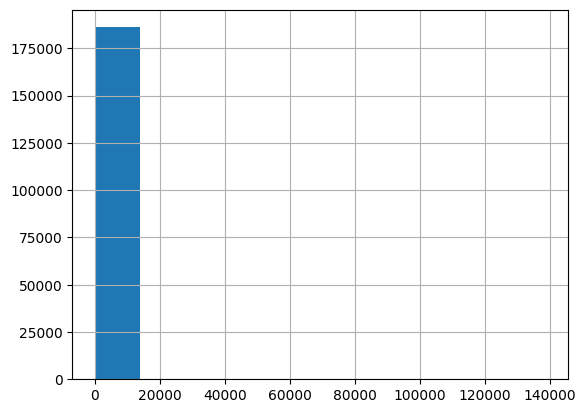

In [100]:
ordertype = 'market'
side = 'ask'
qn = 10
temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()
temp = (temp.dt.total_seconds() * 1000)
temp[temp == 0] = np.nan
temp.ffill(inplace=True)
temp.iloc[np.where(np.array(event_sizes[ordertype][side][qn]) == 0)[0]] = 0
print('Rate:', np.sum(event_sizes[ordertype][side][qn]) / temp.sum())
temp.hist()
plt.show()

In [67]:
temp[temp != 0].mean()

5747.4375

In [80]:
ordertype = 'market'
side = 'ask'
hehe1 = dict()
for qn in tqdm(timers[ordertype][side]):
    hehe1[qn] = np.sum(np.array(event_sizes[ordertype][side][qn]) != 0)

100%|██████████| 1625/1625 [00:08<00:00, 192.59it/s]


In [82]:
hehe1.values()

dict_values([1622, 70766, 1650, 448, 395, 442, 471, 464, 451, 414, 420, 437, 392, 466, 384, 383, 283, 438, 508, 368, 551, 367, 384, 358, 378, 307, 441, 372, 404, 349, 403, 398, 389, 445, 419, 380, 369, 381, 380, 394, 480, 421, 557, 432, 464, 514, 470, 394, 496, 487, 452, 427, 348, 475, 454, 479, 446, 437, 462, 538, 435, 416, 381, 430, 384, 385, 423, 415, 451, 421, 450, 418, 410, 412, 360, 469, 396, 317, 461, 455, 374, 373, 356, 375, 448, 415, 416, 404, 444, 299, 363, 329, 355, 354, 320, 354, 409, 348, 419, 376, 457, 930, 556, 333, 334, 314, 419, 377, 405, 352, 413, 343, 378, 398, 288, 410, 384, 381, 488, 410, 418, 547, 449, 437, 418, 497, 326, 495, 321, 333, 333, 368, 393, 315, 378, 299, 370, 360, 307, 317, 384, 353, 297, 304, 290, 310, 324, 258, 396, 339, 347, 380, 333, 484, 308, 276, 314, 545, 294, 307, 347, 352, 315, 326, 272, 300, 397, 296, 321, 250, 251, 338, 216, 324, 274, 313, 311, 239, 282, 259, 274, 248, 250, 259, 324, 226, 258, 262, 214, 228, 399, 350, 207, 224, 264, 219, 249

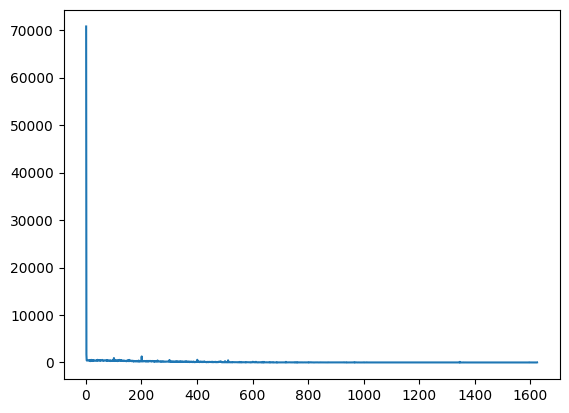

In [83]:
plt.plot(list(hehe1.keys())[1:], list(hehe1.values())[1:])

In [103]:
market_ask_rates[986]

0.03571428571428571

In [ ]:
ordertype = 'market'
side = 'ask'
market_ask_rates = dict()
for qn in tqdm(timers[ordertype][side]):
    temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()
    temp = (temp.dt.total_seconds() * 1000)
    temp[temp == 0] = np.nan
    temp.ffill(inplace=True)
    temp1 = np.array(event_sizes[ordertype][side][qn])
    temp.iloc[np.where(temp1 == 0)[0]] = 0
    market_ask_rates[qn] = temp1.sum() / temp.sum()

 61%|██████    | 987/1625 [07:30<04:42,  2.26it/s]/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_58418/1763424108.py:11: RuntimeWarning: invalid value encountered in scalar divide
  market_ask_rates[qn] = temp1.sum() / temp.sum()
100%|██████████| 1625/1625 [12:13<00:00,  2.22it/s]


<BarContainer object of 399 artists>

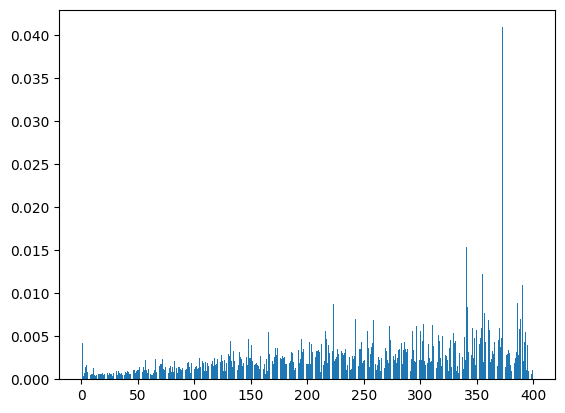

In [121]:
plt.bar(list(market_ask_rates.keys())[1:400], list(market_ask_rates.values())[1:400])

In [108]:
ordertype = 'limit'
side = 'ask'
limit_ask_rates = dict()
for qn in tqdm(timers[ordertype][side]):
    temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()
    temp = (temp.dt.total_seconds() * 1000)
    temp[temp == 0] = np.nan
    temp.ffill(inplace=True)
    temp1 = np.array(event_sizes[ordertype][side][qn])
    temp.iloc[np.where(temp1 == 0)[0]] = 0
    limit_ask_rates[qn] = temp1.sum() / temp.sum()

 88%|████████▊ | 1425/1625 [11:02<01:33,  2.13it/s]/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_58418/2054190485.py:11: RuntimeWarning: invalid value encountered in scalar divide
  limit_ask_rates[qn] = temp1.sum() / temp.sum()
100%|██████████| 1625/1625 [12:33<00:00,  2.16it/s]


<BarContainer object of 399 artists>

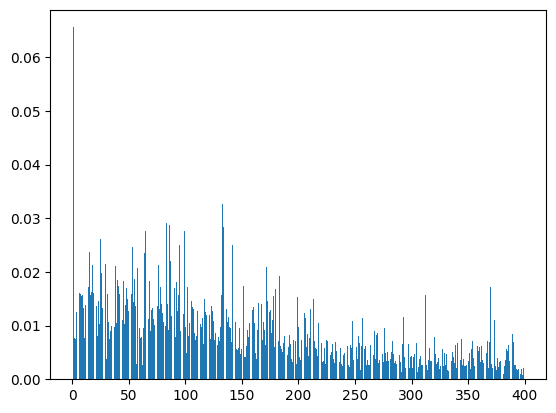

In [109]:
plt.bar(list(limit_ask_rates.keys())[1:400], list(limit_ask_rates.values())[1:400])

In [110]:
ordertype = 'limit'
side = 'bid'
limit_bid_rates = dict()
for qn in tqdm(timers[ordertype][side]):
    temp = pd.Series(timers[ordertype][side][qn]) - pd.Series(timers[ordertype][side][qn]).shift()
    temp = (temp.dt.total_seconds() * 1000)
    temp[temp == 0] = np.nan
    temp.ffill(inplace=True)
    temp1 = np.array(event_sizes[ordertype][side][qn])
    temp.iloc[np.where(temp1 == 0)[0]] = 0
    limit_bid_rates[qn] = temp1.sum() / temp.sum()

 92%|█████████▏| 1491/1625 [11:17<01:02,  2.14it/s]/var/folders/mg/l90d6s9536n6mfzjbqgrxffm0000gn/T/ipykernel_58418/3678880856.py:11: RuntimeWarning: invalid value encountered in scalar divide
  limit_bid_rates[qn] = temp1.sum() / temp.sum()
100%|██████████| 1625/1625 [12:18<00:00,  2.20it/s]


<BarContainer object of 399 artists>

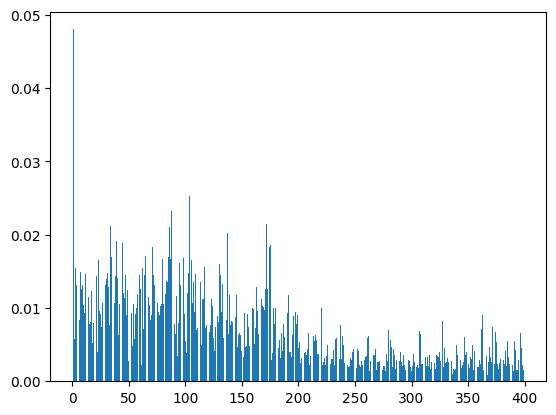

In [111]:
plt.bar(list(limit_bid_rates.keys())[1:400], list(limit_bid_rates.values())[1:400])

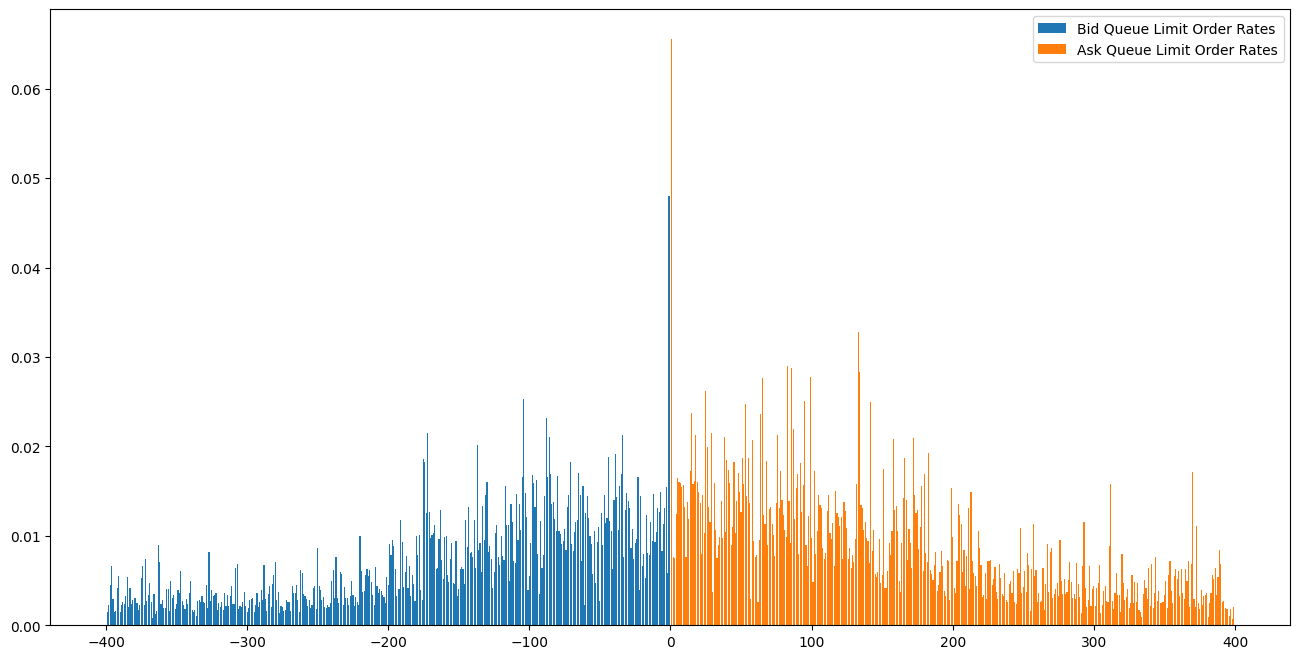

In [118]:
plt.figure(figsize=(16,8))
plt.bar(list(-np.array(list(limit_bid_rates.keys()))[1:400]), list(limit_bid_rates.values())[1:400], label='Bid Queue Limit Order Rates')
plt.bar(list(limit_ask_rates.keys())[1:400], list(limit_ask_rates.values())[1:400], label='Ask Queue Limit Order Rates')
plt.legend()

In [77]:
temp[temp != 0]

54206        10.0
54207         6.0
54208         6.0
54209         6.0
54210         6.0
54211         2.0
54215         5.0
54220         1.0
54221         1.0
54222         1.0
54223         4.0
54224         1.0
54228         2.0
103621        1.0
110214    11678.0
120103        2.0
dtype: float64

In [79]:
temp[temp != 0].values.mean()

733.25

(0.0, 5000.0)

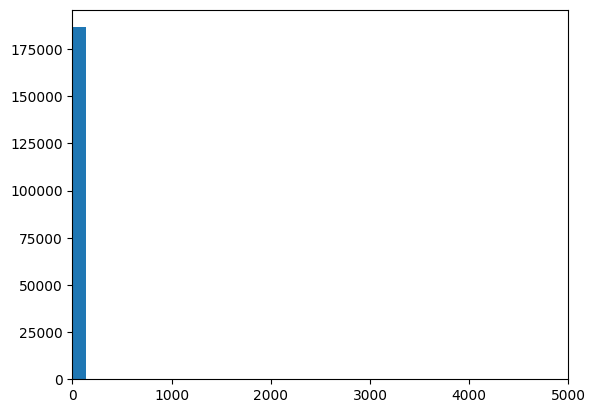

In [60]:
plt.hist(temp, bins=1000)
plt.xlim(0,5000)

In [21]:
np.where(np.array(event_sizes[ordertype][side][qn]) == 0)[0]

array([     0,      6,      7, ..., 244876, 244877, 244878])

In [57]:
pd.Series(timers['limit']['bid'][1]).shift()

0                           NaT
1       2025-02-09 07:12:01.814
2       2025-02-09 07:12:01.814
3       2025-02-09 07:12:02.614
4       2025-02-09 07:12:03.114
                  ...          
25989   2025-02-09 09:03:24.784
25990   2025-02-09 09:03:24.784
25991   2025-02-09 09:03:24.784
25992   2025-02-09 09:03:24.784
25993   2025-02-09 09:03:24.784
Length: 25994, dtype: datetime64[ns]

In [53]:
timers['limit']['bid'][1]

[Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:02.614000'),
 Timestamp('2025-02-09 07:12:03.114000'),
 Timestamp('2025-02-09 07:12:03.214000'),
 Timestamp('2025-02-09 07:12:05.214000'),
 Timestamp('2025-02-09 07:12:05.514000'),
 Timestamp('2025-02-09 07:12:05.914000'),
 Timestamp('2025-02-09 07:12:06.014000'),
 Timestamp('2025-02-09 07:12:06.414000'),
 Timestamp('2025-02-09 07:12:07.814000'),
 Timestamp('2025-02-09 07:12:09.314000'),
 Timestamp('2025-02-09 07:12:09.614000'),
 Timestamp('2025-02-09 07:12:09.814000'),
 Timestamp('2025-02-09 07:12:09.914000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.70

In [44]:
len(timers['limit']['bid'][1])

25994

In [32]:
timers['limit']['bid'][1]

[Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:02.614000'),
 Timestamp('2025-02-09 07:12:03.114000'),
 Timestamp('2025-02-09 07:12:03.214000'),
 Timestamp('2025-02-09 07:12:05.214000'),
 Timestamp('2025-02-09 07:12:05.514000'),
 Timestamp('2025-02-09 07:12:05.914000'),
 Timestamp('2025-02-09 07:12:06.014000'),
 Timestamp('2025-02-09 07:12:06.414000'),
 Timestamp('2025-02-09 07:12:07.814000'),
 Timestamp('2025-02-09 07:12:09.314000'),
 Timestamp('2025-02-09 07:12:09.614000'),
 Timestamp('2025-02-09 07:12:09.814000'),
 Timestamp('2025-02-09 07:12:09.914000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.70

In [13]:
timers['limit']['bid'][1]

[Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:01.814000'),
 Timestamp('2025-02-09 07:12:02.614000'),
 Timestamp('2025-02-09 07:12:03.114000'),
 Timestamp('2025-02-09 07:12:03.214000'),
 Timestamp('2025-02-09 07:12:05.214000'),
 Timestamp('2025-02-09 07:12:05.514000'),
 Timestamp('2025-02-09 07:12:05.914000'),
 Timestamp('2025-02-09 07:12:06.014000'),
 Timestamp('2025-02-09 07:12:06.414000'),
 Timestamp('2025-02-09 07:12:07.814000'),
 Timestamp('2025-02-09 07:12:09.314000'),
 Timestamp('2025-02-09 07:12:09.614000'),
 Timestamp('2025-02-09 07:12:09.814000'),
 Timestamp('2025-02-09 07:12:09.914000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.707000'),
 Timestamp('2025-02-09 07:12:10.70

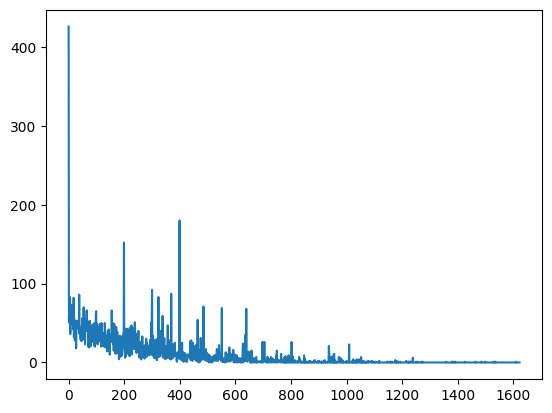

In [80]:
plt.plot([len(pnts) for tim, pnts in timers['limit']['ask'].items() if tim > 1])

In [61]:
data['RDEPTH']['BTCUSDT'].iloc[:10]

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:02.067,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2675,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.069,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1318,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.071,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2672,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:02.464,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1317,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,31,44,47,48,67,77,85,134,135,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,4,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.252,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2670,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.255,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2667,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.373,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,67,77,85,134,0,0,0,0,0,0,0,0,0,0,2667,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.751,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,55,67,77,85,0,0,0,0,0,0,0,0,0,0,2666,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:03.758,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1454,1,1,1,1,28,1,336,1,1,0,0,0,0,0,0,0,0,0,0,1,23,31,44,47,48,55,67,77,85,0,0,0,0,0,0,0,0,0,0,2666,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [45]:
data['DEPTH']['BTCUSDT']

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:01.914,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.014,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.114,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.214,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 01:29:51.014,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.114,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1
2025-02-10 01:29:51.214,-1,-8,-73,-79,-125,-126,-141,-180,-200,-201,1188,1,1,1,1,1,1,1,1,29,1,35,36,37,38,56,79,112,115,153,811,1,207,50,1,1,1,4,46,1


In [21]:
data['NEWLIM']['BTCUSDT'].query('newlim != 0')

,bp1,ap1,newlim
timestamp,,,
2025-02-09 07:12:10.707,-43,43,1
2025-02-09 07:12:10.707,-43,43,1
2025-02-09 07:12:10.707,-67,68,1
2025-02-09 07:12:10.707,-67,68,1
2025-02-09 07:12:10.707,-67,68,1
...,...,...,...
2025-02-10 01:29:48.528,-177,176,-1
2025-02-10 01:29:48.528,-176,177,-1
2025-02-10 01:29:48.528,-176,177,-1


In [26]:
data['RDEPTH']['BTCUSDT'].loc['2025-02-09 07:12:10'].iloc[170:250]

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bp11,bp12,bp13,bp14,bp15,bp16,bp17,bp18,bp19,bp20,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,bv11,bv12,bv13,bv14,bv15,bv16,bv17,bv18,bv19,bv20,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-02-09 07:12:10.706,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,0,0,0,0,0,0,0,0,0,0,1553,1,1,1,1,1,1,177,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
data['TRADE']['BTCUSDT']

,p,q,mm_buy
timestamp,,,
2025-02-09 07:12:02.067,1,1,0
2025-02-09 07:12:02.069,1,3,0
2025-02-09 07:12:02.071,-1,1,1
2025-02-09 07:12:02.464,1,2,0
2025-02-09 07:12:03.252,1,1,0
...,...,...,...
2025-02-10 01:29:48.730,1,3,0
2025-02-10 01:29:49.639,-1,1,1
2025-02-10 01:29:49.970,1,1,0


In [4]:
data['DEPTH']['BTCUSDT'].head(100)

,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-02-09 07:12:01.814,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:01.914,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.014,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1318,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2675,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.114,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.214,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.314,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.414,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2672,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.514,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1314,1,1,1,1,28,1,336,1,1,1,31,44,47,48,67,77,85,134,135,2670,1,1,1,1,1,1,1,1,4
2025-02-09 07:12:02.614,-1,-2,-3,-4,-9,-10,-19,-20,-21,-22,1317,1,1,1,1,28,1,336,1,1,1,23,31,44,47,48,67,77,85,134,2670,1,1,1,1,1,1,1,1,1
